In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import numpy as np
import random

from src.data.ETL import get_loaders
from src.data.make_dataset import ImageDataset
from src.models import UNet, AttentionUNet, TransformerUNet, TransformerUNetParallel
from src.utils.Metrics import Metrics
from src.utils.losses import DiceBCELoss
from src.utils.plot import plot_losses, plot_generic
from src.utils.config import DTYPE, get_device
from src.utils.config import ACCURACY, AUPRC, AUROC_, DICE_SCORE, F1_SCORE, JACCARD_INDEX, PRECISION, RECALL, SPECIFICITY

from src.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # Set default size of plots.
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
device = get_device()
device, torch.cuda.device_count()

(device(type='cuda'), 1)

In [3]:
# train_dataset = ImageDataset("../data/raw/Br35H-Mask-RCNN/TRAIN", "../data/raw/Br35H-Mask-RCNN/TRAIN_MASK")
# val_dataset = ImageDataset("../data/raw/Br35H-Mask-RCNN/VAL", "../data/raw/Br35H-Mask-RCNN/VAL_MASK")

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

train_ratio = 0.60
val_ratio = 0.20
batch_size = 256
size = (128, 128)
num_workers = 2
is_raw = False

train_loader, val_loader, test_loader = get_loaders(f'../data/{"raw" if is_raw else "processed"}/lgg-mri-segmentation/kaggle_3m', train_ratio, val_ratio, batch_size, size, num_workers, is_raw)
print(f'Train samples: {len(train_loader.dataset)}')
print(f'Val samples: {len(val_loader.dataset)}')
print(f'Test samples: {len(test_loader.dataset)}')

test: 100%|██████████| 412/412 [00:00<00:00, 251536.14it/s]

Train samples: 892
Val samples: 275
Test samples: 206


Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9767, Dice=0.0000, IoU=0.4883, Loss=1.6180]

Training   - Accuracy: 0.7974 | Dice: 0.1541 | IoU: 0.4385 | Loss: 1.7281
Validation - Accuracy: 0.9657 | Dice: 0.0223 | IoU: 0.4885 | Loss: 1.6060

Epoch 2/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9783, Dice=0.0000, IoU=0.4891, Loss=1.6099]

Training   - Accuracy: 0.9211 | Dice: 0.3321 | IoU: 0.5593 | Loss: 1.4054
Validation - Accuracy: 0.9705 | Dice: 0.0439 | IoU: 0.4965 | Loss: 1.5965

Epoch 3/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9773, Dice=0.0000, IoU=0.4886, Loss=1.5386]

Training   - Accuracy: 0.9592 | Dice: 0.4692 | IoU: 0.6325 | Loss: 1.1874
Validation - Accuracy: 0.9696 | Dice: 0.0415 | IoU: 0.4954 | Loss: 1.5219

Epoch 4/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.66s/it, Acc=0.9776, Dice=0.0000, IoU=0.4888, Loss=1.4576]

Training   - Accuracy: 0.9761 | Dice: 0.5680 | IoU: 0.6862 | Loss: 0.9735
Validation - Accuracy: 0.9702 | Dice: 0.0442 | IoU: 0.4964 | Loss: 1.4424

Epoch 5/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9785, Dice=0.0027, IoU=0.4899, Loss=1.3673]


Training   - Accuracy: 0.9788 | Dice: 0.5740 | IoU: 0.6905 | Loss: 0.8165
Validation - Accuracy: 0.9708 | Dice: 0.0517 | IoU: 0.4987 | Loss: 1.3504

Epoch 6/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.64s/it, Acc=0.9789, Dice=0.0293, IoU=0.4969, Loss=1.2636]

Training   - Accuracy: 0.9801 | Dice: 0.5803 | IoU: 0.6943 | Loss: 0.7081
Validation - Accuracy: 0.9717 | Dice: 0.1052 | IoU: 0.5136 | Loss: 1.2330

Epoch 7/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.67s/it, Acc=0.9813, Dice=0.2332, IoU=0.5566, Loss=1.0705]

Training   - Accuracy: 0.9803 | Dice: 0.5573 | IoU: 0.6831 | Loss: 0.6794
Validation - Accuracy: 0.9730 | Dice: 0.2542 | IoU: 0.5592 | Loss: 1.0517

Epoch 8/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9818, Dice=0.2704, IoU=0.5691, Loss=0.9725]

Training   - Accuracy: 0.9810 | Dice: 0.5772 | IoU: 0.6932 | Loss: 0.6383
Validation - Accuracy: 0.9749 | Dice: 0.2819 | IoU: 0.5694 | Loss: 0.9522

Epoch 9/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9820, Dice=0.3031, IoU=0.5803, Loss=0.8776]

Training   - Accuracy: 0.9810 | Dice: 0.5704 | IoU: 0.6899 | Loss: 0.6243
Validation - Accuracy: 0.9773 | Dice: 0.4206 | IoU: 0.6217 | Loss: 0.8114

Epoch 10/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9824, Dice=0.3384, IoU=0.5930, Loss=0.7911]

Training   - Accuracy: 0.9812 | Dice: 0.5702 | IoU: 0.6899 | Loss: 0.6054
Validation - Accuracy: 0.9794 | Dice: 0.5207 | IoU: 0.6656 | Loss: 0.6962

Epoch 11/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9824, Dice=0.3202, IoU=0.5865, Loss=0.7805]

Training   - Accuracy: 0.9818 | Dice: 0.6000 | IoU: 0.7050 | Loss: 0.5806
Validation - Accuracy: 0.9797 | Dice: 0.5044 | IoU: 0.6584 | Loss: 0.6794

Epoch 12/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9828, Dice=0.3414, IoU=0.5943, Loss=0.7274]

Training   - Accuracy: 0.9817 | Dice: 0.5869 | IoU: 0.6984 | Loss: 0.5747
Validation - Accuracy: 0.9817 | Dice: 0.5893 | IoU: 0.6996 | Loss: 0.6037

Epoch 13/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9827, Dice=0.3593, IoU=0.6008, Loss=0.6872]

Training   - Accuracy: 0.9823 | Dice: 0.6104 | IoU: 0.7107 | Loss: 0.5485
Validation - Accuracy: 0.9829 | Dice: 0.6600 | IoU: 0.7376 | Loss: 0.5470

Epoch 14/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9821, Dice=0.2869, IoU=0.5748, Loss=0.7220]

Training   - Accuracy: 0.9832 | Dice: 0.6484 | IoU: 0.7314 | Loss: 0.5154
Validation - Accuracy: 0.9813 | Dice: 0.5624 | IoU: 0.6861 | Loss: 0.5809

Epoch 15/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.71s/it, Acc=0.9827, Dice=0.3595, IoU=0.6009, Loss=0.6591]

Training   - Accuracy: 0.9822 | Dice: 0.6027 | IoU: 0.7067 | Loss: 0.5362
Validation - Accuracy: 0.9841 | Dice: 0.6987 | IoU: 0.7604 | Loss: 0.5050

Epoch 16/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9827, Dice=0.3342, IoU=0.5916, Loss=0.6649]

Training   - Accuracy: 0.9835 | Dice: 0.6552 | IoU: 0.7352 | Loss: 0.4954
Validation - Accuracy: 0.9836 | Dice: 0.6479 | IoU: 0.7312 | Loss: 0.5108

Epoch 17/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9820, Dice=0.3581, IoU=0.6000, Loss=0.6836]

Training   - Accuracy: 0.9836 | Dice: 0.6579 | IoU: 0.7367 | Loss: 0.4899
Validation - Accuracy: 0.9818 | Dice: 0.6715 | IoU: 0.7434 | Loss: 0.5463

Epoch 18/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9822, Dice=0.2883, IoU=0.5753, Loss=0.6855]

Training   - Accuracy: 0.9825 | Dice: 0.6179 | IoU: 0.7147 | Loss: 0.5161
Validation - Accuracy: 0.9831 | Dice: 0.6338 | IoU: 0.7234 | Loss: 0.5137

Epoch 19/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9825, Dice=0.3168, IoU=0.5853, Loss=0.6717]

Training   - Accuracy: 0.9838 | Dice: 0.6622 | IoU: 0.7393 | Loss: 0.4721
Validation - Accuracy: 0.9826 | Dice: 0.6083 | IoU: 0.7098 | Loss: 0.5224

Epoch 20/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.83s/it, Acc=0.9825, Dice=0.3215, IoU=0.5870, Loss=0.6523]


Training   - Accuracy: 0.9829 | Dice: 0.6415 | IoU: 0.7275 | Loss: 0.4901
Validation - Accuracy: 0.9834 | Dice: 0.6358 | IoU: 0.7246 | Loss: 0.4929



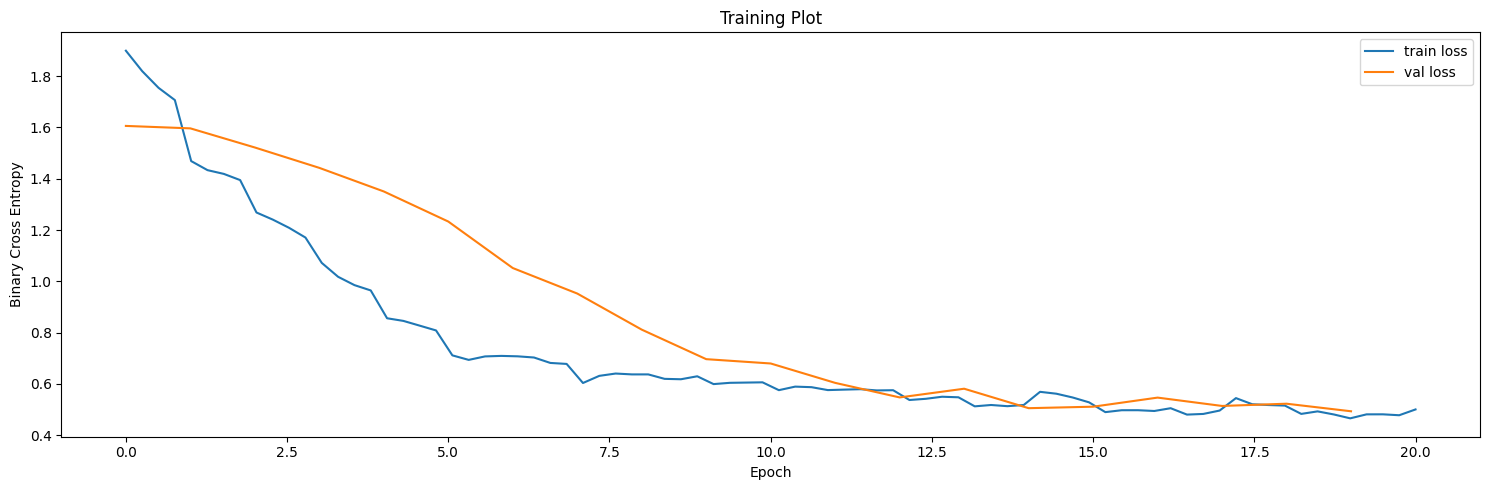

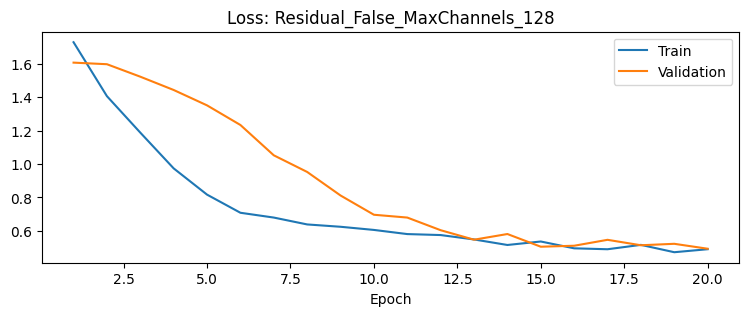

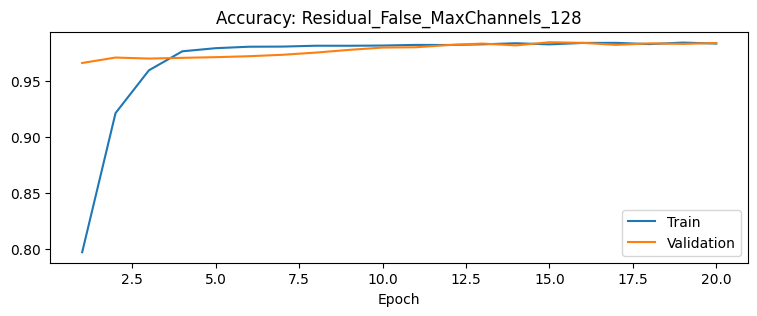

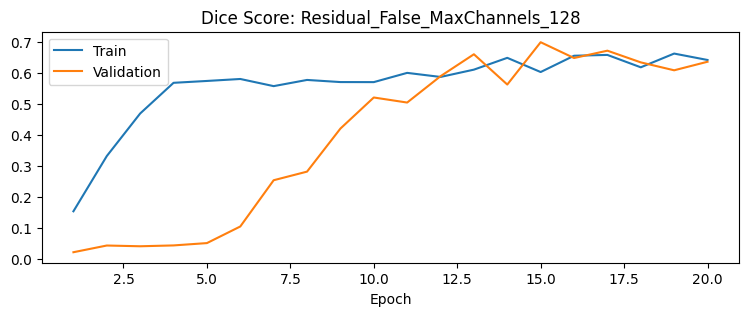

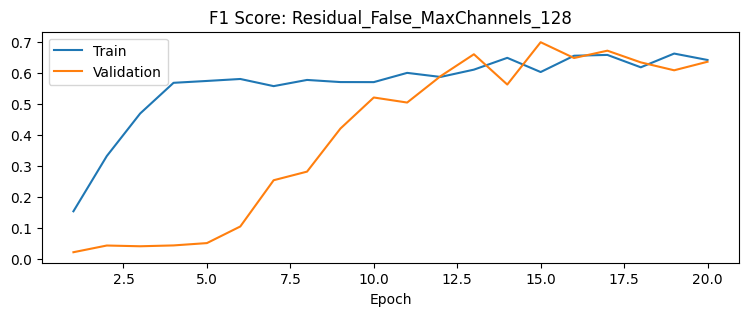

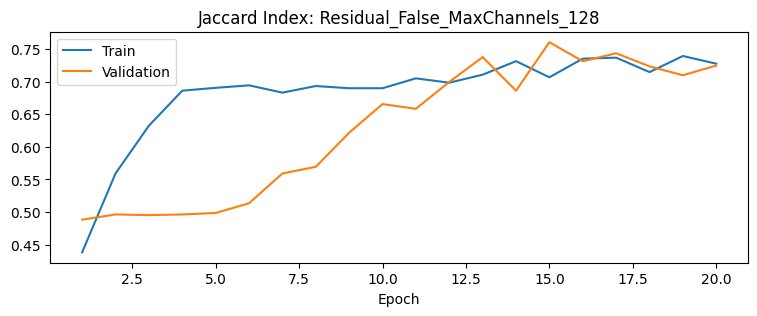

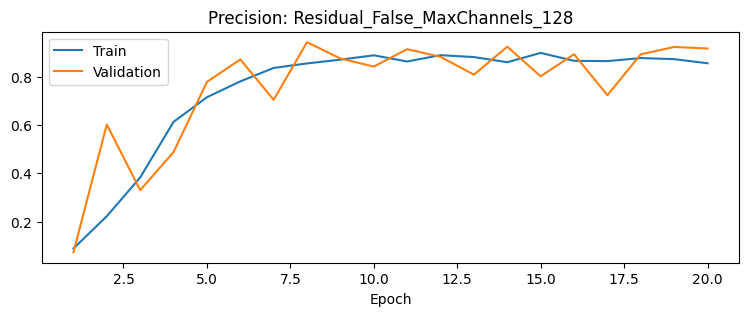

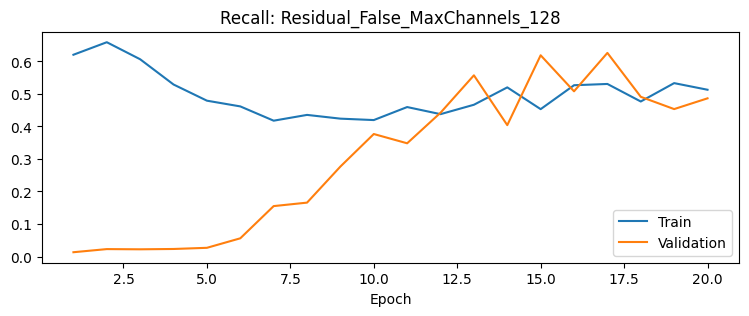

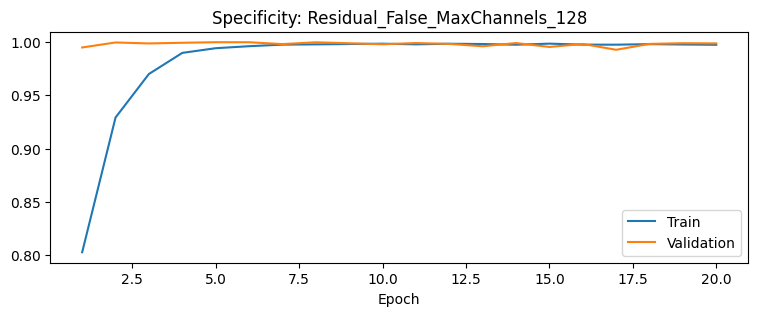

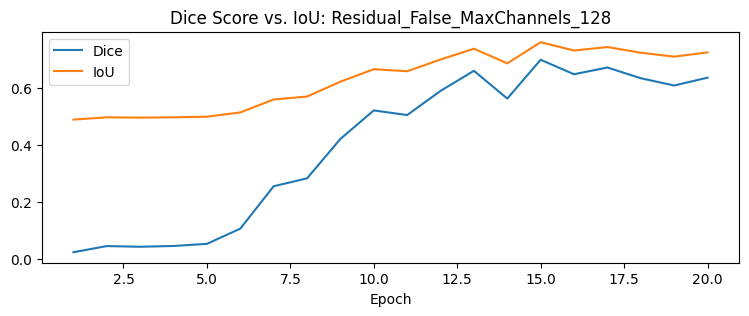

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.82s/it, Acc=0.9786, Dice=0.0000, IoU=0.4893, Loss=1.4319]

Training   - Accuracy: 0.9424 | Dice: 0.1299 | IoU: 0.5058 | Loss: 1.3564
Validation - Accuracy: 0.9703 | Dice: 0.0000 | IoU: 0.4851 | Loss: 1.3846

Epoch 2/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9786, Dice=0.0003, IoU=0.4894, Loss=1.1649]

Training   - Accuracy: 0.9713 | Dice: 0.4322 | IoU: 0.6233 | Loss: 0.9461
Validation - Accuracy: 0.9704 | Dice: 0.0110 | IoU: 0.4880 | Loss: 1.1153

Epoch 3/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9796, Dice=0.0897, IoU=0.5132, Loss=1.1099]

Training   - Accuracy: 0.9786 | Dice: 0.5897 | IoU: 0.6982 | Loss: 0.7268
Validation - Accuracy: 0.9724 | Dice: 0.1348 | IoU: 0.5223 | Loss: 1.1018

Epoch 4/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.81s/it, Acc=0.9818, Dice=0.2710, IoU=0.5692, Loss=0.9845]

Training   - Accuracy: 0.9806 | Dice: 0.5969 | IoU: 0.7029 | Loss: 0.6186
Validation - Accuracy: 0.9749 | Dice: 0.2850 | IoU: 0.5705 | Loss: 0.9490

Epoch 5/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.61s/it, Acc=0.9823, Dice=0.3190, IoU=0.5860, Loss=0.8816]

Training   - Accuracy: 0.9817 | Dice: 0.6310 | IoU: 0.7212 | Loss: 0.5509
Validation - Accuracy: 0.9775 | Dice: 0.4324 | IoU: 0.6265 | Loss: 0.7981

Epoch 6/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9815, Dice=0.3345, IoU=0.5911, Loss=0.8371]

Training   - Accuracy: 0.9838 | Dice: 0.6790 | IoU: 0.7487 | Loss: 0.4907
Validation - Accuracy: 0.9777 | Dice: 0.6029 | IoU: 0.7044 | Loss: 0.7393

Epoch 7/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9810, Dice=0.3416, IoU=0.5935, Loss=0.7803]

Training   - Accuracy: 0.9846 | Dice: 0.7031 | IoU: 0.7632 | Loss: 0.4529
Validation - Accuracy: 0.9774 | Dice: 0.6333 | IoU: 0.7202 | Loss: 0.6642

Epoch 8/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9819, Dice=0.3513, IoU=0.5975, Loss=0.6884]

Training   - Accuracy: 0.9855 | Dice: 0.7190 | IoU: 0.7732 | Loss: 0.4174
Validation - Accuracy: 0.9821 | Dice: 0.6970 | IoU: 0.7583 | Loss: 0.5367

Epoch 9/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9822, Dice=0.3596, IoU=0.6007, Loss=0.6660]

Training   - Accuracy: 0.9866 | Dice: 0.7472 | IoU: 0.7913 | Loss: 0.3844
Validation - Accuracy: 0.9839 | Dice: 0.7411 | IoU: 0.7861 | Loss: 0.5014

Epoch 10/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9825, Dice=0.3595, IoU=0.6008, Loss=0.6142]

Training   - Accuracy: 0.9877 | Dice: 0.7689 | IoU: 0.8060 | Loss: 0.3539
Validation - Accuracy: 0.9861 | Dice: 0.7584 | IoU: 0.7983 | Loss: 0.4378

Epoch 11/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9830, Dice=0.3905, IoU=0.6128, Loss=0.4900]

Training   - Accuracy: 0.9881 | Dice: 0.7768 | IoU: 0.8114 | Loss: 0.3395
Validation - Accuracy: 0.9860 | Dice: 0.7723 | IoU: 0.8073 | Loss: 0.4054

Epoch 12/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.64s/it, Acc=0.9842, Dice=0.6480, IoU=0.7317, Loss=0.4984]

Training   - Accuracy: 0.9885 | Dice: 0.7864 | IoU: 0.8181 | Loss: 0.3214
Validation - Accuracy: 0.9857 | Dice: 0.7788 | IoU: 0.8115 | Loss: 0.4165

Epoch 13/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9843, Dice=0.4306, IoU=0.6293, Loss=0.4725]

Training   - Accuracy: 0.9890 | Dice: 0.8007 | IoU: 0.8282 | Loss: 0.3092
Validation - Accuracy: 0.9869 | Dice: 0.7303 | IoU: 0.7809 | Loss: 0.3670

Epoch 14/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it, Acc=0.9884, Dice=0.6642, IoU=0.7427, Loss=0.3488]

Training   - Accuracy: 0.9890 | Dice: 0.7923 | IoU: 0.8224 | Loss: 0.3002
Validation - Accuracy: 0.9896 | Dice: 0.8181 | IoU: 0.8408 | Loss: 0.2994

Epoch 15/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.61s/it, Acc=0.9859, Dice=0.5150, IoU=0.6663, Loss=0.3951]

Training   - Accuracy: 0.9899 | Dice: 0.8157 | IoU: 0.8392 | Loss: 0.2768
Validation - Accuracy: 0.9880 | Dice: 0.7591 | IoU: 0.7997 | Loss: 0.3186

Epoch 16/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it, Acc=0.9878, Dice=0.6328, IoU=0.7253, Loss=0.3493]

Training   - Accuracy: 0.9904 | Dice: 0.8245 | IoU: 0.8458 | Loss: 0.2616
Validation - Accuracy: 0.9898 | Dice: 0.8259 | IoU: 0.8465 | Loss: 0.2865

Epoch 17/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9896, Dice=0.7016, IoU=0.7649, Loss=0.3000]

Training   - Accuracy: 0.9908 | Dice: 0.8317 | IoU: 0.8512 | Loss: 0.2478
Validation - Accuracy: 0.9907 | Dice: 0.8363 | IoU: 0.8546 | Loss: 0.2591

Epoch 18/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it, Acc=0.9871, Dice=0.5794, IoU=0.6974, Loss=0.3659]

Training   - Accuracy: 0.9915 | Dice: 0.8500 | IoU: 0.8652 | Loss: 0.2321
Validation - Accuracy: 0.9886 | Dice: 0.7724 | IoU: 0.8087 | Loss: 0.2925

Epoch 19/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9917, Dice=0.7914, IoU=0.8232, Loss=0.2646]

Training   - Accuracy: 0.9917 | Dice: 0.8508 | IoU: 0.8659 | Loss: 0.2244
Validation - Accuracy: 0.9912 | Dice: 0.8492 | IoU: 0.8644 | Loss: 0.2433

Epoch 20/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.66s/it, Acc=0.9915, Dice=0.7665, IoU=0.8064, Loss=0.2552]


Training   - Accuracy: 0.9921 | Dice: 0.8602 | IoU: 0.8733 | Loss: 0.2134
Validation - Accuracy: 0.9913 | Dice: 0.8459 | IoU: 0.8620 | Loss: 0.2301



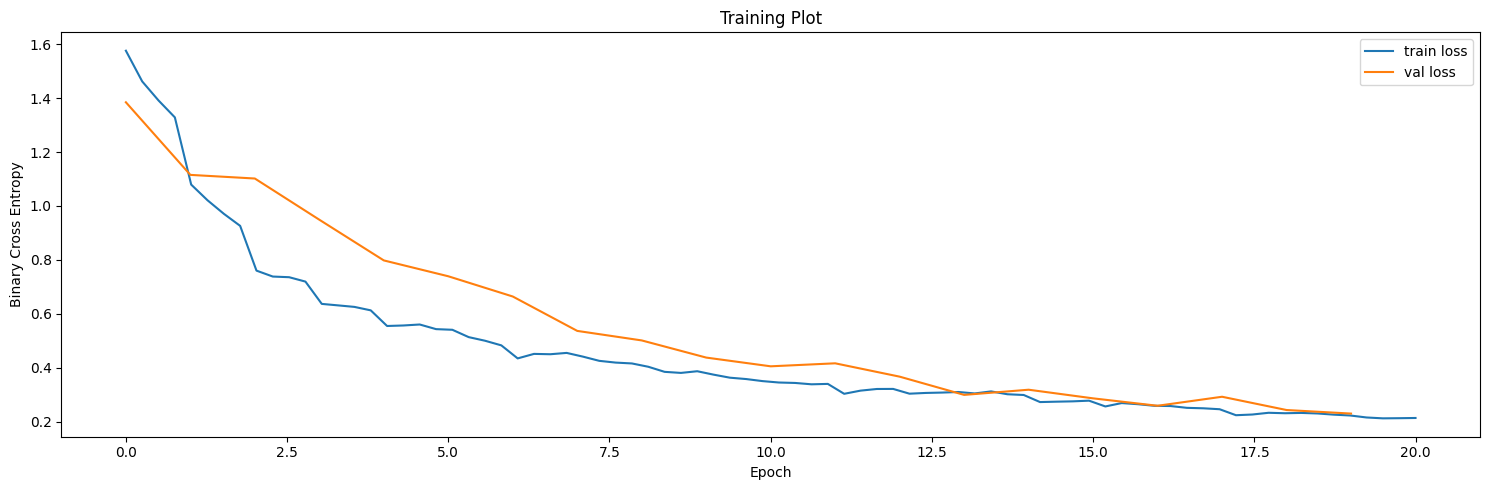

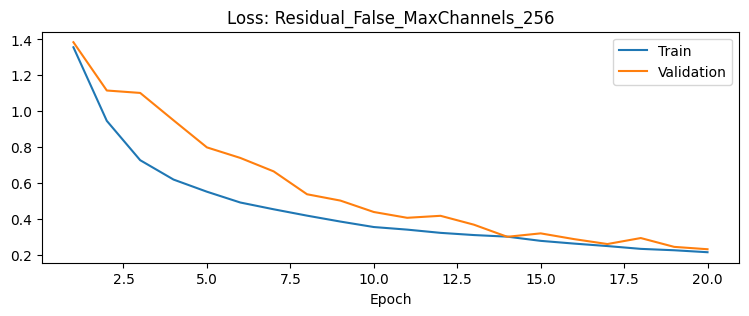

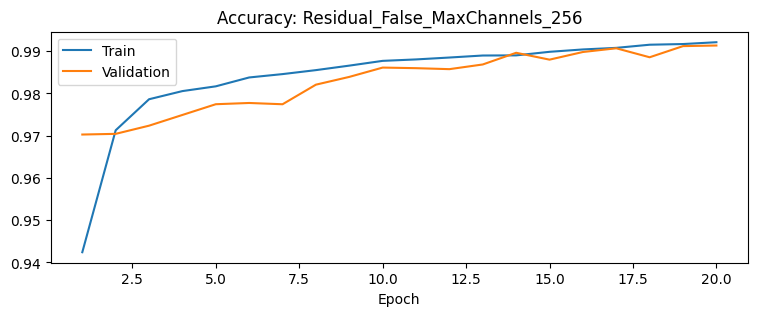

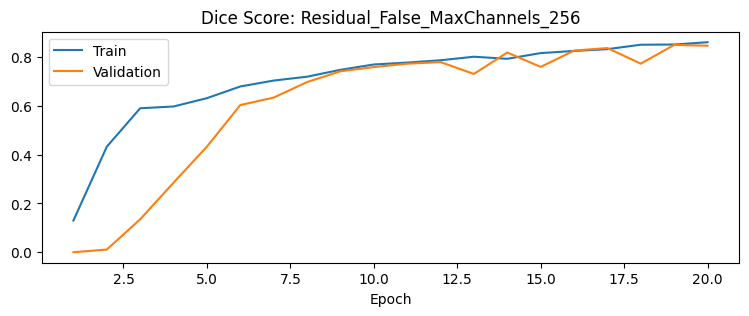

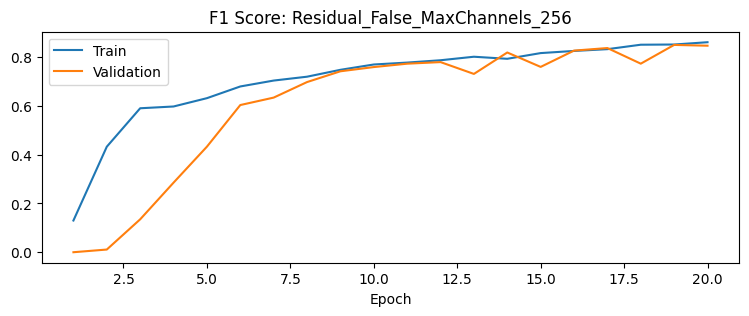

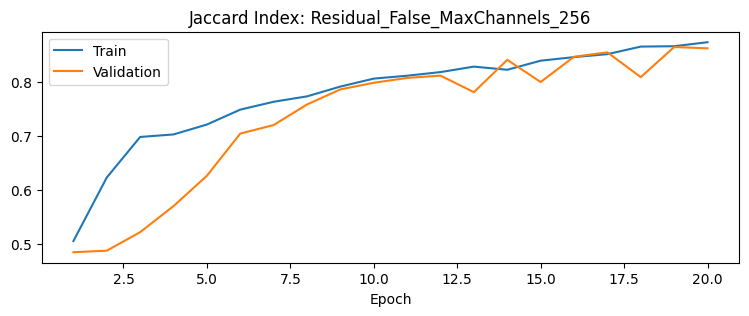

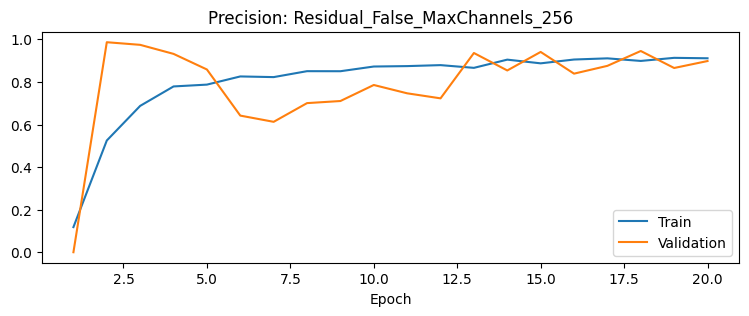

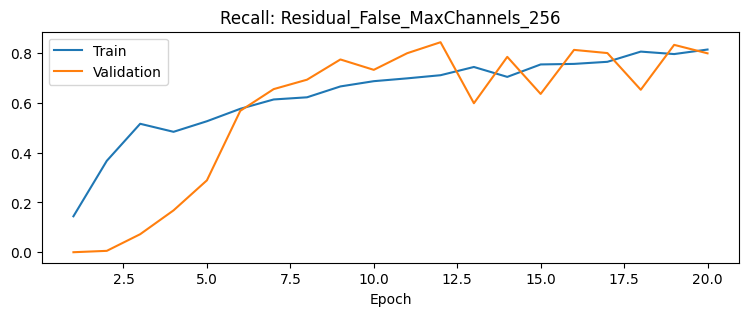

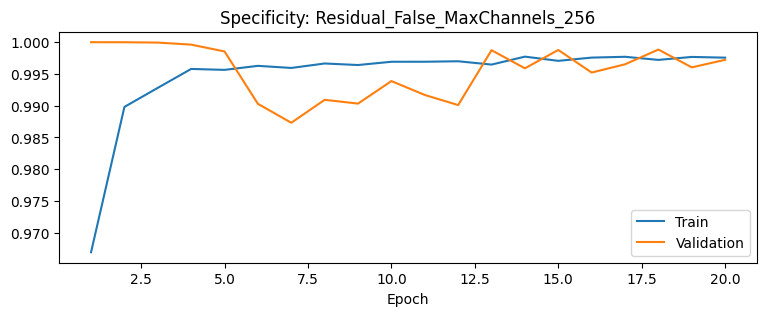

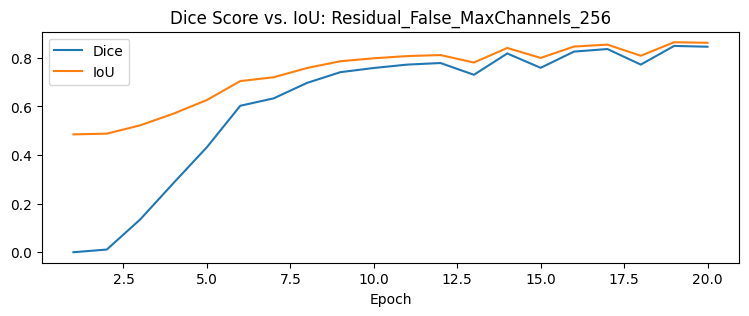

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it, Acc=0.9789, Dice=0.0327, IoU=0.4978, Loss=1.5124]


Training   - Accuracy: 0.8639 | Dice: 0.1752 | IoU: 0.4790 | Loss: 1.5238
Validation - Accuracy: 0.9725 | Dice: 0.1663 | IoU: 0.5315 | Loss: 1.4890

Epoch 2/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.66s/it, Acc=0.8213, Dice=0.1376, IoU=0.4463, Loss=1.5175]


Training   - Accuracy: 0.9482 | Dice: 0.4395 | IoU: 0.6144 | Loss: 1.2117
Validation - Accuracy: 0.8850 | Dice: 0.3021 | IoU: 0.5300 | Loss: 1.4700

Epoch 3/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9198, Dice=0.0505, IoU=0.4728, Loss=1.4887]


Training   - Accuracy: 0.9757 | Dice: 0.6149 | IoU: 0.7096 | Loss: 0.9348
Validation - Accuracy: 0.9117 | Dice: 0.0766 | IoU: 0.4756 | Loss: 1.4754

Epoch 4/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.7450, Dice=0.0510, IoU=0.3847, Loss=1.7027]


Training   - Accuracy: 0.9834 | Dice: 0.6928 | IoU: 0.7565 | Loss: 0.6492
Validation - Accuracy: 0.7415 | Dice: 0.1446 | IoU: 0.4068 | Loss: 1.6877

Epoch 5/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.67s/it, Acc=0.8452, Dice=0.0562, IoU=0.4367, Loss=1.5491]


Training   - Accuracy: 0.9846 | Dice: 0.7048 | IoU: 0.7642 | Loss: 0.5465
Validation - Accuracy: 0.8491 | Dice: 0.1467 | IoU: 0.4631 | Loss: 1.5151

Epoch 6/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it, Acc=0.9779, Dice=0.0233, IoU=0.4949, Loss=1.2163]


Training   - Accuracy: 0.9848 | Dice: 0.6992 | IoU: 0.7610 | Loss: 0.5056
Validation - Accuracy: 0.9669 | Dice: 0.1350 | IoU: 0.5196 | Loss: 1.1683

Epoch 7/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9813, Dice=0.3456, IoU=0.5951, Loss=0.7783]

Training   - Accuracy: 0.9852 | Dice: 0.6987 | IoU: 0.7609 | Loss: 0.4770
Validation - Accuracy: 0.9769 | Dice: 0.6540 | IoU: 0.7311 | Loss: 0.6673

Epoch 8/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it, Acc=0.9819, Dice=0.2760, IoU=0.5710, Loss=0.7644]


Training   - Accuracy: 0.9862 | Dice: 0.7251 | IoU: 0.7773 | Loss: 0.4330
Validation - Accuracy: 0.9798 | Dice: 0.5094 | IoU: 0.6607 | Loss: 0.6434

Epoch 9/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.67s/it, Acc=0.9777, Dice=0.3013, IoU=0.5775, Loss=0.7994]

Training   - Accuracy: 0.9872 | Dice: 0.7529 | IoU: 0.7954 | Loss: 0.3968
Validation - Accuracy: 0.9783 | Dice: 0.6421 | IoU: 0.7253 | Loss: 0.6215

Epoch 10/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9819, Dice=0.3497, IoU=0.5969, Loss=0.6713]

Training   - Accuracy: 0.9870 | Dice: 0.7433 | IoU: 0.7891 | Loss: 0.3908
Validation - Accuracy: 0.9822 | Dice: 0.6875 | IoU: 0.7528 | Loss: 0.5133

Epoch 11/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9814, Dice=0.2454, IoU=0.5606, Loss=0.7020]


Training   - Accuracy: 0.9865 | Dice: 0.7239 | IoU: 0.7768 | Loss: 0.3937
Validation - Accuracy: 0.9818 | Dice: 0.5844 | IoU: 0.6972 | Loss: 0.5361

Epoch 12/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9380, Dice=0.3741, IoU=0.5834, Loss=0.8098]


Training   - Accuracy: 0.9884 | Dice: 0.7777 | IoU: 0.8122 | Loss: 0.3436
Validation - Accuracy: 0.9677 | Dice: 0.6229 | IoU: 0.7096 | Loss: 0.6649

Epoch 13/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9829, Dice=0.3513, IoU=0.5979, Loss=0.5684]


Training   - Accuracy: 0.9888 | Dice: 0.7839 | IoU: 0.8166 | Loss: 0.3276
Validation - Accuracy: 0.9876 | Dice: 0.7701 | IoU: 0.8067 | Loss: 0.3785

Epoch 14/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it, Acc=0.9851, Dice=0.4735, IoU=0.6476, Loss=0.4595]


Training   - Accuracy: 0.9893 | Dice: 0.7991 | IoU: 0.8273 | Loss: 0.3123
Validation - Accuracy: 0.9871 | Dice: 0.7359 | IoU: 0.7845 | Loss: 0.3568

Epoch 15/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9861, Dice=0.5333, IoU=0.6748, Loss=0.4301]


Training   - Accuracy: 0.9899 | Dice: 0.8083 | IoU: 0.8340 | Loss: 0.2916
Validation - Accuracy: 0.9891 | Dice: 0.7932 | IoU: 0.8231 | Loss: 0.3187

Epoch 16/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9827, Dice=0.3404, IoU=0.5939, Loss=0.5371]


Training   - Accuracy: 0.9903 | Dice: 0.8214 | IoU: 0.8435 | Loss: 0.2833
Validation - Accuracy: 0.9885 | Dice: 0.7757 | IoU: 0.8109 | Loss: 0.3332

Epoch 17/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9844, Dice=0.4356, IoU=0.6314, Loss=0.4529]


Training   - Accuracy: 0.9905 | Dice: 0.8237 | IoU: 0.8453 | Loss: 0.2762
Validation - Accuracy: 0.9881 | Dice: 0.7588 | IoU: 0.7996 | Loss: 0.3206

Epoch 18/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9841, Dice=0.4177, IoU=0.6240, Loss=0.4494]


Training   - Accuracy: 0.9911 | Dice: 0.8361 | IoU: 0.8546 | Loss: 0.2598
Validation - Accuracy: 0.9893 | Dice: 0.7894 | IoU: 0.8206 | Loss: 0.2992

Epoch 19/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9888, Dice=0.6863, IoU=0.7555, Loss=0.3227]

Training   - Accuracy: 0.9914 | Dice: 0.8432 | IoU: 0.8600 | Loss: 0.2487
Validation - Accuracy: 0.9907 | Dice: 0.8422 | IoU: 0.8589 | Loss: 0.2702

Epoch 20/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9901, Dice=0.7209, IoU=0.7768, Loss=0.2997]


Training   - Accuracy: 0.9919 | Dice: 0.8529 | IoU: 0.8676 | Loss: 0.2351
Validation - Accuracy: 0.9912 | Dice: 0.8491 | IoU: 0.8644 | Loss: 0.2557



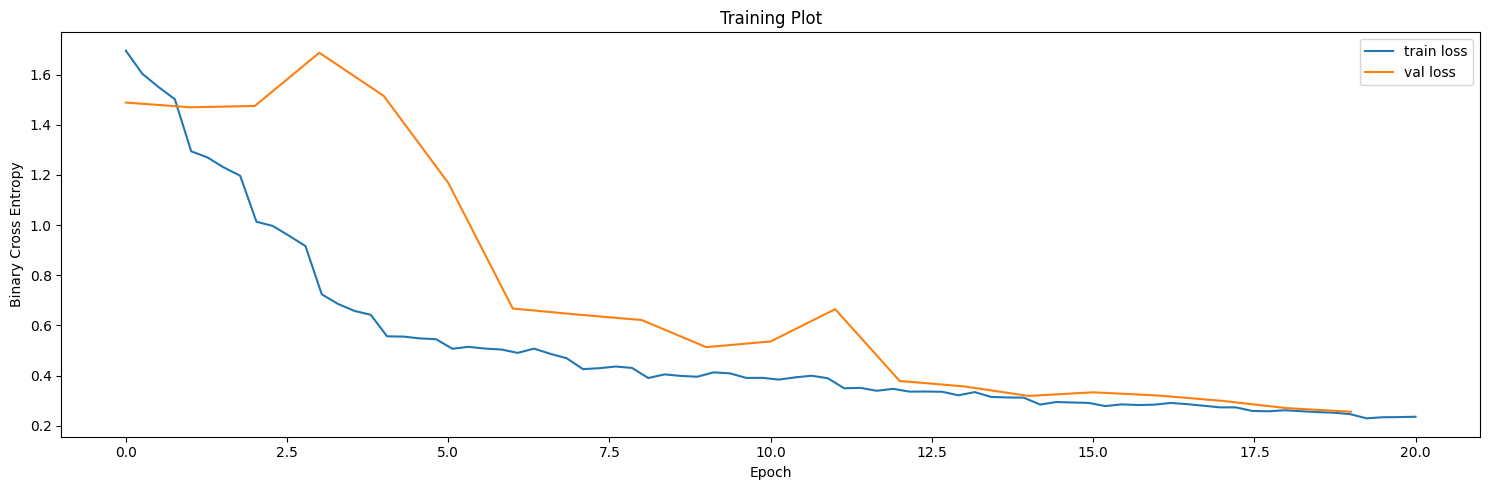

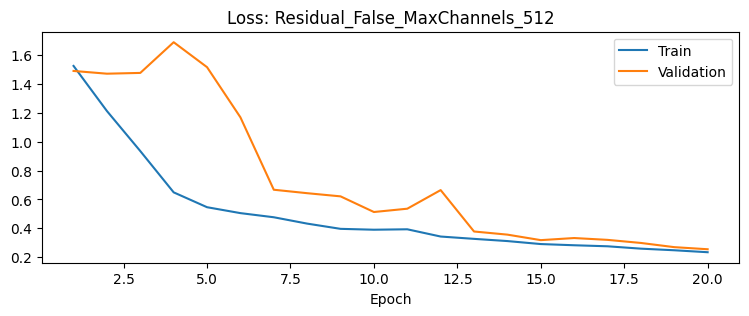

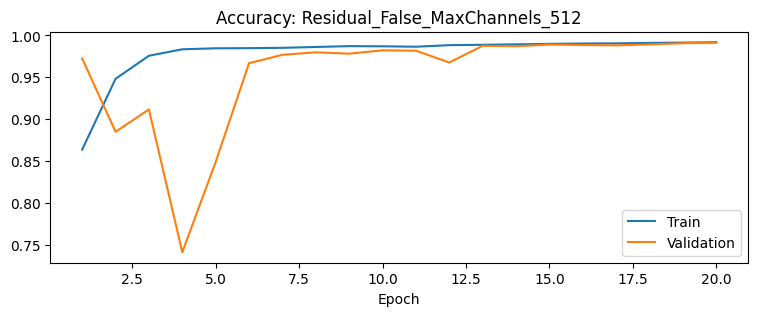

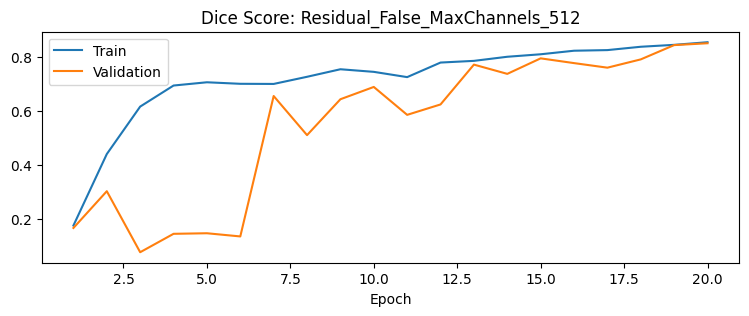

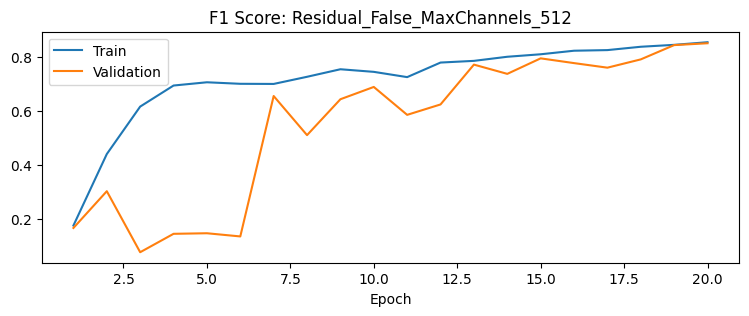

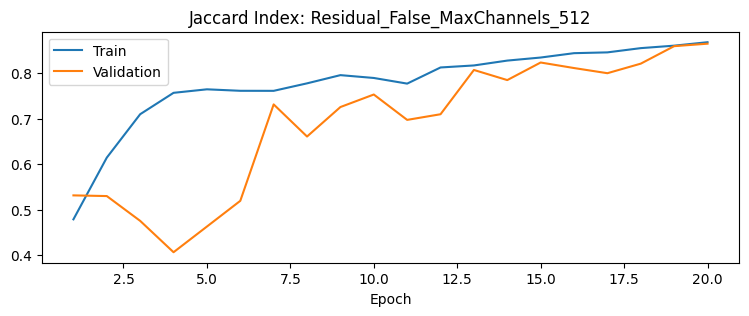

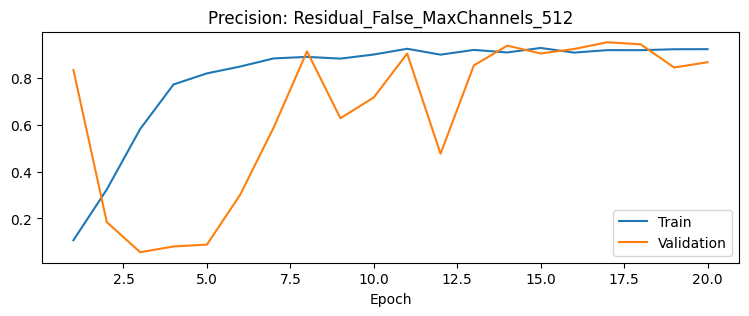

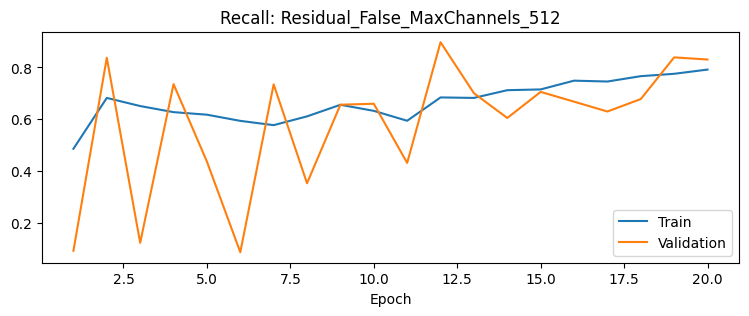

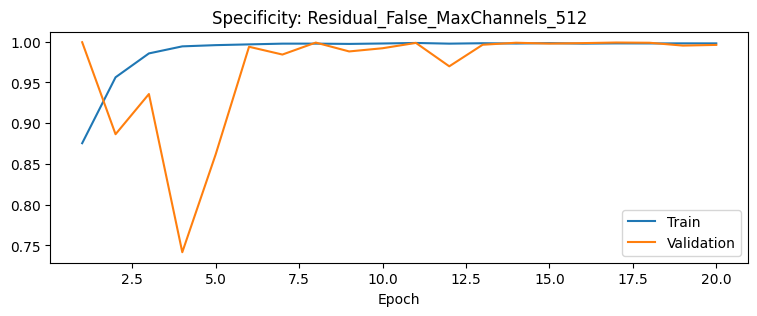

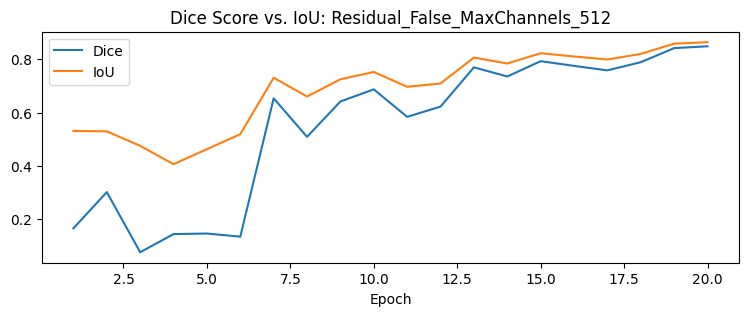

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9786, Dice=0.0000, IoU=0.4893, Loss=1.3918]

Training   - Accuracy: 0.9588 | Dice: 0.2675 | IoU: 0.5565 | Loss: 1.0137
Validation - Accuracy: 0.9704 | Dice: 0.0059 | IoU: 0.4866 | Loss: 1.3773

Epoch 2/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9786, Dice=0.0000, IoU=0.4893, Loss=1.2410]

Training   - Accuracy: 0.9780 | Dice: 0.4956 | IoU: 0.6536 | Loss: 0.5804
Validation - Accuracy: 0.9703 | Dice: 0.0021 | IoU: 0.4857 | Loss: 1.2304

Epoch 3/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9786, Dice=0.0000, IoU=0.4893, Loss=1.1720]

Training   - Accuracy: 0.9801 | Dice: 0.5602 | IoU: 0.6845 | Loss: 0.4872
Validation - Accuracy: 0.9703 | Dice: 0.0027 | IoU: 0.4858 | Loss: 1.1664

Epoch 4/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9786, Dice=0.0033, IoU=0.4901, Loss=1.0162]

Training   - Accuracy: 0.9805 | Dice: 0.5581 | IoU: 0.6837 | Loss: 0.4679
Validation - Accuracy: 0.9716 | Dice: 0.0857 | IoU: 0.5081 | Loss: 0.9869

Epoch 5/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9814, Dice=0.2357, IoU=0.5575, Loss=0.8284]

Training   - Accuracy: 0.9817 | Dice: 0.6267 | IoU: 0.7189 | Loss: 0.4170
Validation - Accuracy: 0.9737 | Dice: 0.2119 | IoU: 0.5461 | Loss: 0.8337

Epoch 6/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9819, Dice=0.2792, IoU=0.5721, Loss=0.7657]

Training   - Accuracy: 0.9813 | Dice: 0.5771 | IoU: 0.6933 | Loss: 0.4409
Validation - Accuracy: 0.9751 | Dice: 0.2878 | IoU: 0.5715 | Loss: 0.7439

Epoch 7/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9824, Dice=0.3250, IoU=0.5882, Loss=0.6518]

Training   - Accuracy: 0.9825 | Dice: 0.6379 | IoU: 0.7253 | Loss: 0.3943
Validation - Accuracy: 0.9782 | Dice: 0.4463 | IoU: 0.6326 | Loss: 0.5700

Epoch 8/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it, Acc=0.9825, Dice=0.3336, IoU=0.5913, Loss=0.6060]

Training   - Accuracy: 0.9828 | Dice: 0.6345 | IoU: 0.7236 | Loss: 0.3899
Validation - Accuracy: 0.9799 | Dice: 0.5253 | IoU: 0.6680 | Loss: 0.4918

Epoch 9/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9827, Dice=0.3478, IoU=0.5966, Loss=0.5545]

Training   - Accuracy: 0.9839 | Dice: 0.6700 | IoU: 0.7437 | Loss: 0.3587
Validation - Accuracy: 0.9825 | Dice: 0.6273 | IoU: 0.7196 | Loss: 0.4116

Epoch 10/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9827, Dice=0.3490, IoU=0.5970, Loss=0.5362]

Training   - Accuracy: 0.9840 | Dice: 0.6713 | IoU: 0.7445 | Loss: 0.3509
Validation - Accuracy: 0.9836 | Dice: 0.6669 | IoU: 0.7418 | Loss: 0.3786

Epoch 11/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9827, Dice=0.3501, IoU=0.5974, Loss=0.5213]

Training   - Accuracy: 0.9848 | Dice: 0.6839 | IoU: 0.7521 | Loss: 0.3338
Validation - Accuracy: 0.9846 | Dice: 0.7000 | IoU: 0.7614 | Loss: 0.3537

Epoch 12/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9828, Dice=0.3445, IoU=0.5954, Loss=0.4995]

Training   - Accuracy: 0.9856 | Dice: 0.7137 | IoU: 0.7701 | Loss: 0.3105
Validation - Accuracy: 0.9858 | Dice: 0.7327 | IoU: 0.7818 | Loss: 0.3223

Epoch 13/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9828, Dice=0.3440, IoU=0.5952, Loss=0.4879]

Training   - Accuracy: 0.9857 | Dice: 0.7146 | IoU: 0.7707 | Loss: 0.3043
Validation - Accuracy: 0.9852 | Dice: 0.7031 | IoU: 0.7635 | Loss: 0.3308

Epoch 14/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9826, Dice=0.3646, IoU=0.6027, Loss=0.4858]

Training   - Accuracy: 0.9857 | Dice: 0.7194 | IoU: 0.7736 | Loss: 0.3002
Validation - Accuracy: 0.9850 | Dice: 0.7499 | IoU: 0.7922 | Loss: 0.3418

Epoch 15/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.83s/it, Acc=0.9846, Dice=0.4501, IoU=0.6375, Loss=0.3842]

Training   - Accuracy: 0.9865 | Dice: 0.7327 | IoU: 0.7822 | Loss: 0.2846
Validation - Accuracy: 0.9874 | Dice: 0.7570 | IoU: 0.7981 | Loss: 0.2687

Epoch 16/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9848, Dice=0.4567, IoU=0.6403, Loss=0.3794]

Training   - Accuracy: 0.9872 | Dice: 0.7515 | IoU: 0.7944 | Loss: 0.2622
Validation - Accuracy: 0.9875 | Dice: 0.7664 | IoU: 0.8042 | Loss: 0.2724

Epoch 17/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9862, Dice=0.5479, IoU=0.6817, Loss=0.3292]

Training   - Accuracy: 0.9878 | Dice: 0.7652 | IoU: 0.8037 | Loss: 0.2464
Validation - Accuracy: 0.9882 | Dice: 0.7912 | IoU: 0.8213 | Loss: 0.2515

Epoch 18/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9866, Dice=0.5559, IoU=0.6857, Loss=0.3333]

Training   - Accuracy: 0.9886 | Dice: 0.7856 | IoU: 0.8176 | Loss: 0.2296
Validation - Accuracy: 0.9885 | Dice: 0.7849 | IoU: 0.8171 | Loss: 0.2456

Epoch 19/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9911, Dice=0.7537, IoU=0.7979, Loss=0.2380]

Training   - Accuracy: 0.9892 | Dice: 0.7981 | IoU: 0.8265 | Loss: 0.2173
Validation - Accuracy: 0.9891 | Dice: 0.8164 | IoU: 0.8393 | Loss: 0.2380

Epoch 20/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9898, Dice=0.7098, IoU=0.7699, Loss=0.2522]


Training   - Accuracy: 0.9889 | Dice: 0.7920 | IoU: 0.8221 | Loss: 0.2203
Validation - Accuracy: 0.9892 | Dice: 0.8184 | IoU: 0.8407 | Loss: 0.2323



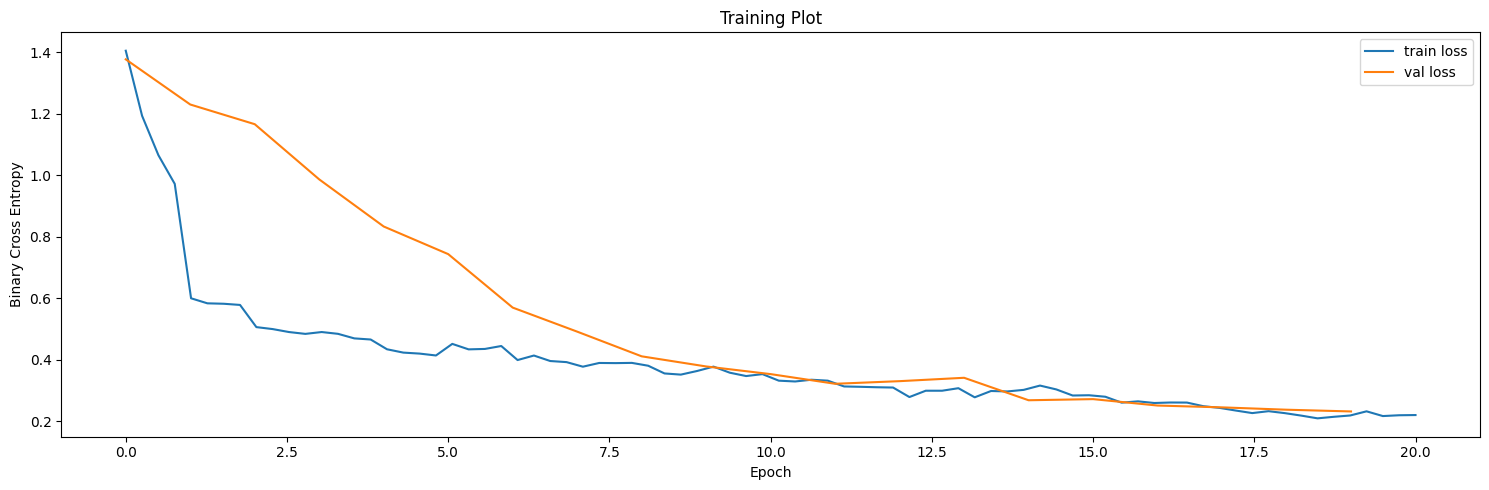

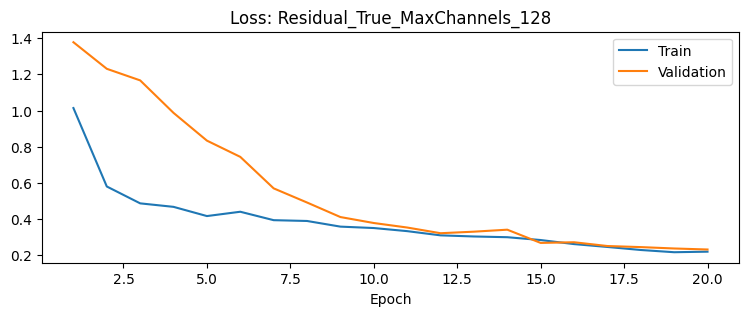

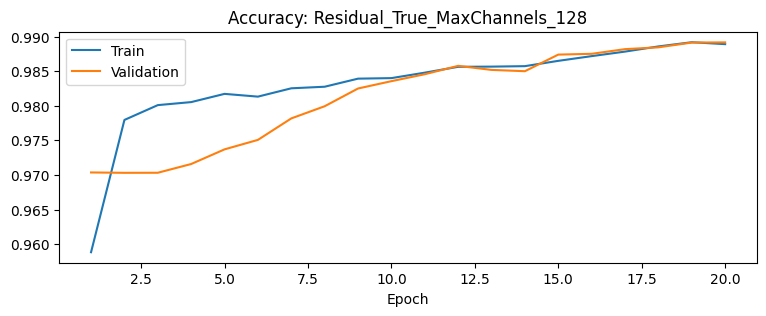

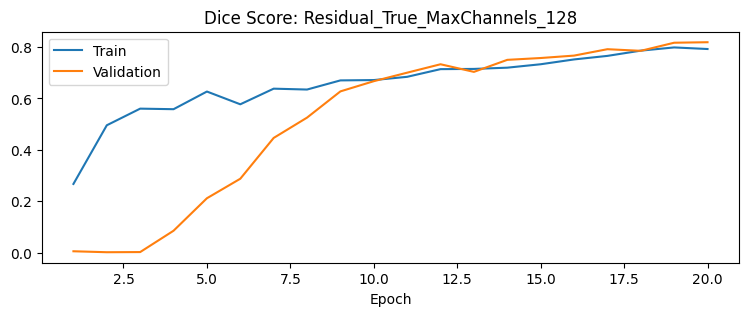

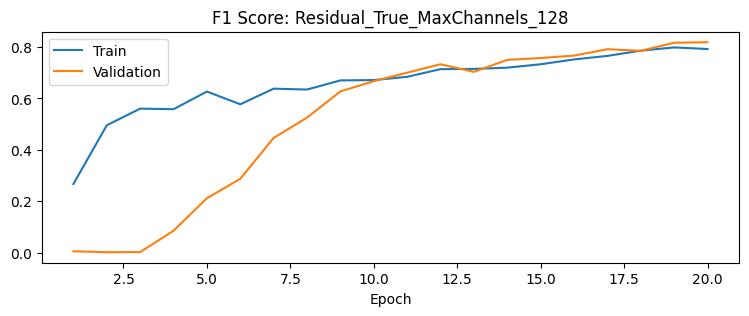

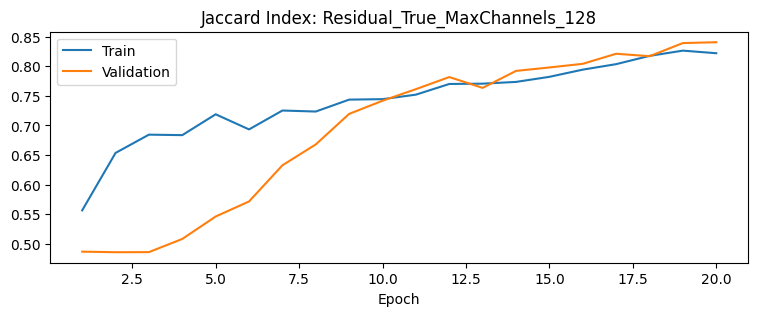

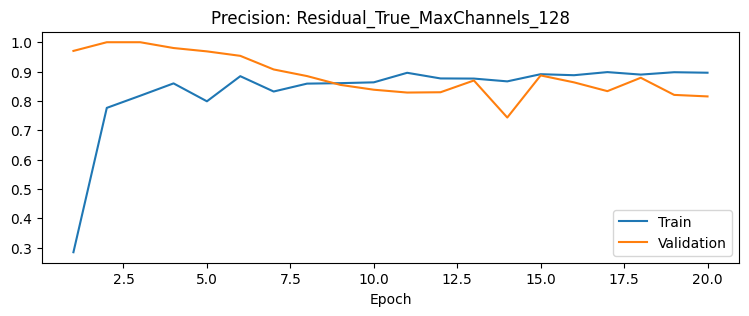

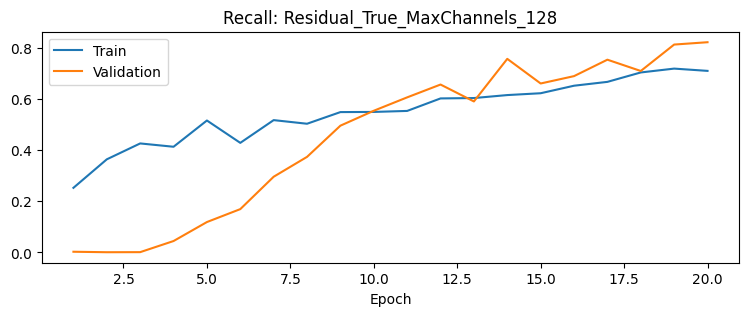

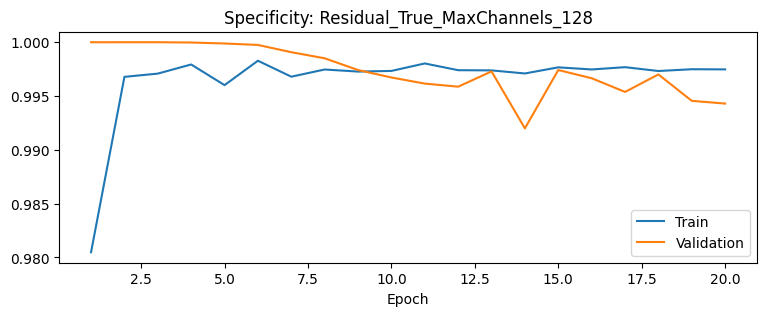

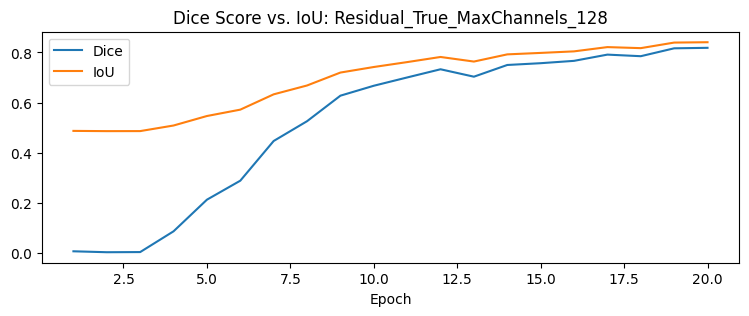

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9786, Dice=0.0000, IoU=0.4893, Loss=1.2831]

Training   - Accuracy: 0.9420 | Dice: 0.1749 | IoU: 0.5187 | Loss: 1.1370
Validation - Accuracy: 0.9702 | Dice: 0.0053 | IoU: 0.4864 | Loss: 1.2376

Epoch 2/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9786, Dice=0.0000, IoU=0.4893, Loss=1.2018]

Training   - Accuracy: 0.9751 | Dice: 0.4231 | IoU: 0.6216 | Loss: 0.6735
Validation - Accuracy: 0.9704 | Dice: 0.0057 | IoU: 0.4866 | Loss: 1.1831

Epoch 3/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.67s/it, Acc=0.9785, Dice=0.0068, IoU=0.4910, Loss=1.0103]

Training   - Accuracy: 0.9792 | Dice: 0.5181 | IoU: 0.6643 | Loss: 0.5185
Validation - Accuracy: 0.9711 | Dice: 0.0969 | IoU: 0.5110 | Loss: 0.9334

Epoch 4/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9264, Dice=0.1912, IoU=0.5157, Loss=1.0470]

Training   - Accuracy: 0.9812 | Dice: 0.5796 | IoU: 0.6945 | Loss: 0.4409
Validation - Accuracy: 0.9286 | Dice: 0.3404 | IoU: 0.5662 | Loss: 1.0117

Epoch 5/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.7767, Dice=0.1595, IoU=0.4293, Loss=1.4598]

Training   - Accuracy: 0.9842 | Dice: 0.6746 | IoU: 0.7464 | Loss: 0.3559
Validation - Accuracy: 0.7626 | Dice: 0.1957 | IoU: 0.4320 | Loss: 1.4558

Epoch 6/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.71s/it, Acc=0.8364, Dice=0.2021, IoU=0.4727, Loss=1.2059]

Training   - Accuracy: 0.9848 | Dice: 0.6971 | IoU: 0.7598 | Loss: 0.3326
Validation - Accuracy: 0.8265 | Dice: 0.2460 | IoU: 0.4809 | Loss: 1.2034

Epoch 7/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9688, Dice=0.4345, IoU=0.6230, Loss=0.6939]

Training   - Accuracy: 0.9860 | Dice: 0.7238 | IoU: 0.7765 | Loss: 0.2997
Validation - Accuracy: 0.9716 | Dice: 0.6017 | IoU: 0.7006 | Loss: 0.6092

Epoch 8/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9125, Dice=0.3045, IoU=0.5452, Loss=0.8942]

Training   - Accuracy: 0.9866 | Dice: 0.7360 | IoU: 0.7843 | Loss: 0.2801
Validation - Accuracy: 0.9284 | Dice: 0.4238 | IoU: 0.5977 | Loss: 0.8477

Epoch 9/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9784, Dice=0.5782, IoU=0.6923, Loss=0.5141]

Training   - Accuracy: 0.9879 | Dice: 0.7672 | IoU: 0.8050 | Loss: 0.2478
Validation - Accuracy: 0.9783 | Dice: 0.6653 | IoU: 0.7382 | Loss: 0.4582

Epoch 10/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, Acc=0.9854, Dice=0.6951, IoU=0.7589, Loss=0.4200]

Training   - Accuracy: 0.9889 | Dice: 0.7938 | IoU: 0.8234 | Loss: 0.2247
Validation - Accuracy: 0.9814 | Dice: 0.7111 | IoU: 0.7663 | Loss: 0.4027

Epoch 11/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9843, Dice=0.4276, IoU=0.6281, Loss=0.4391]

Training   - Accuracy: 0.9897 | Dice: 0.8113 | IoU: 0.8360 | Loss: 0.2076
Validation - Accuracy: 0.9835 | Dice: 0.6255 | IoU: 0.7192 | Loss: 0.3705

Epoch 12/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.66s/it, Acc=0.9890, Dice=0.7724, IoU=0.8090, Loss=0.3849]

Training   - Accuracy: 0.9899 | Dice: 0.8119 | IoU: 0.8365 | Loss: 0.2005
Validation - Accuracy: 0.9770 | Dice: 0.6999 | IoU: 0.7573 | Loss: 0.4359

Epoch 13/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9871, Dice=0.5910, IoU=0.7032, Loss=0.3275]

Training   - Accuracy: 0.9907 | Dice: 0.8315 | IoU: 0.8510 | Loss: 0.1865
Validation - Accuracy: 0.9869 | Dice: 0.7734 | IoU: 0.8085 | Loss: 0.2806

Epoch 14/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9885, Dice=0.6652, IoU=0.7433, Loss=0.2907]

Training   - Accuracy: 0.9906 | Dice: 0.8283 | IoU: 0.8486 | Loss: 0.1858
Validation - Accuracy: 0.9871 | Dice: 0.7895 | IoU: 0.8195 | Loss: 0.2670

Epoch 15/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.67s/it, Acc=0.9906, Dice=0.7364, IoU=0.7866, Loss=0.2115]


Training   - Accuracy: 0.9912 | Dice: 0.8434 | IoU: 0.8601 | Loss: 0.1759
Validation - Accuracy: 0.9903 | Dice: 0.8205 | IoU: 0.8428 | Loss: 0.1919

Epoch 16/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9912, Dice=0.7747, IoU=0.8116, Loss=0.2153]

Training   - Accuracy: 0.9917 | Dice: 0.8502 | IoU: 0.8655 | Loss: 0.1607
Validation - Accuracy: 0.9897 | Dice: 0.8101 | IoU: 0.8352 | Loss: 0.2031

Epoch 17/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9910, Dice=0.7525, IoU=0.7970, Loss=0.2101]

Training   - Accuracy: 0.9924 | Dice: 0.8657 | IoU: 0.8777 | Loss: 0.1534
Validation - Accuracy: 0.9911 | Dice: 0.8407 | IoU: 0.8581 | Loss: 0.1789

Epoch 18/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.86s/it, Acc=0.9888, Dice=0.6591, IoU=0.7401, Loss=0.2437]

Training   - Accuracy: 0.9927 | Dice: 0.8714 | IoU: 0.8823 | Loss: 0.1430
Validation - Accuracy: 0.9905 | Dice: 0.8243 | IoU: 0.8457 | Loss: 0.1908

Epoch 19/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9904, Dice=0.7258, IoU=0.7800, Loss=0.2181]

Training   - Accuracy: 0.9929 | Dice: 0.8749 | IoU: 0.8852 | Loss: 0.1398
Validation - Accuracy: 0.9906 | Dice: 0.8203 | IoU: 0.8428 | Loss: 0.1839

Epoch 20/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9926, Dice=0.8038, IoU=0.8322, Loss=0.1710]


Training   - Accuracy: 0.9933 | Dice: 0.8828 | IoU: 0.8917 | Loss: 0.1300
Validation - Accuracy: 0.9920 | Dice: 0.8567 | IoU: 0.8705 | Loss: 0.1592



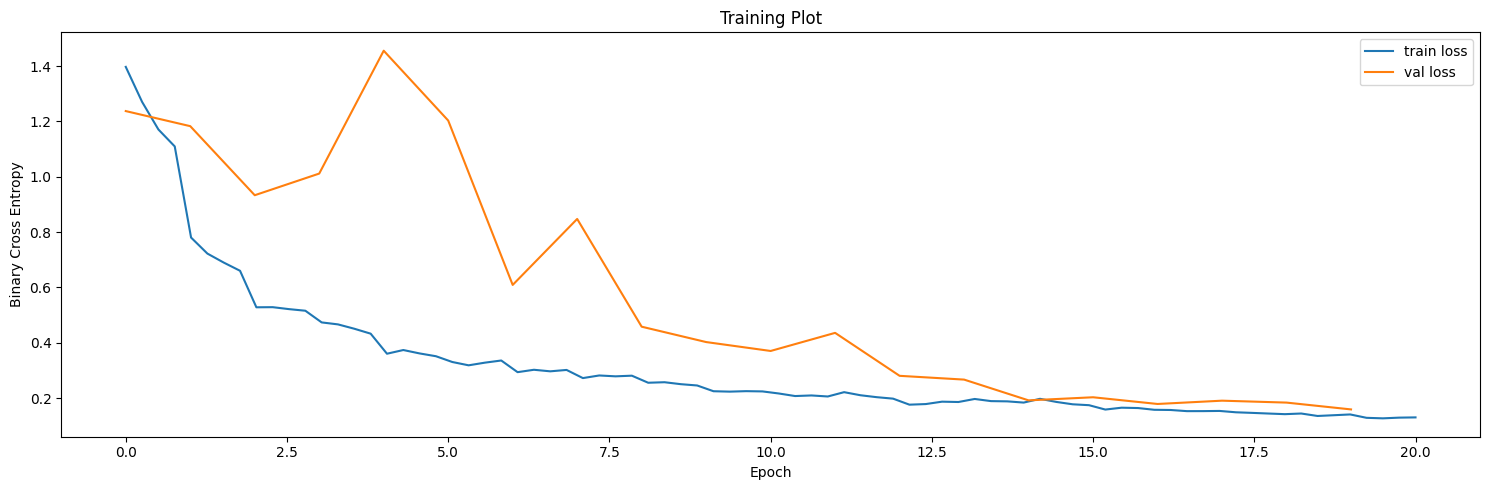

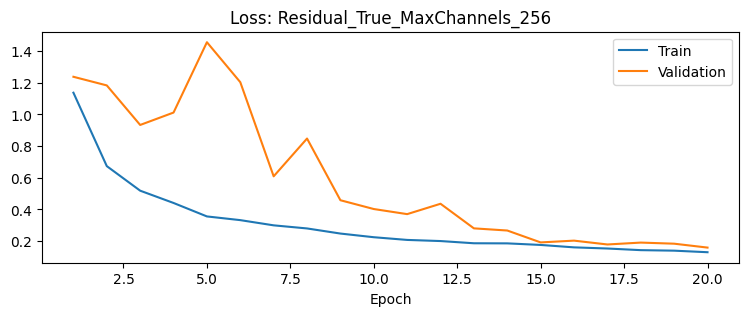

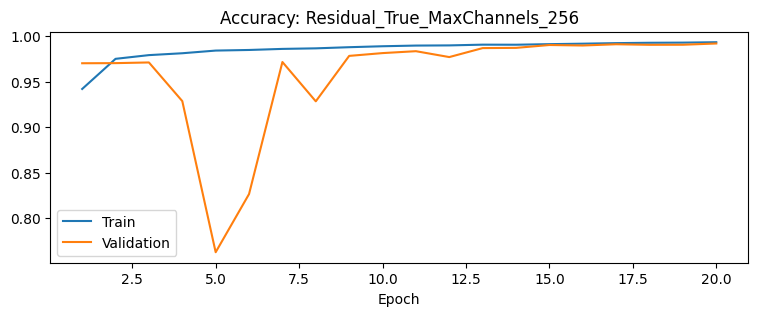

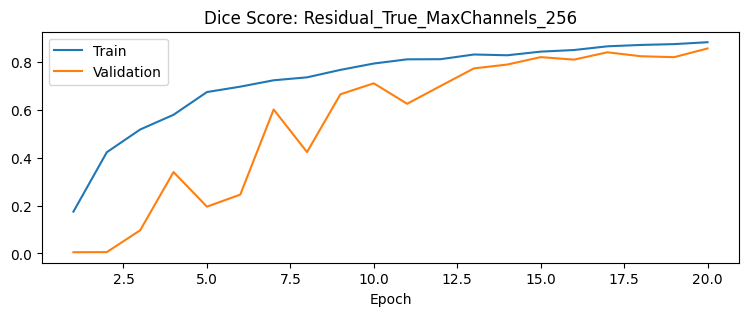

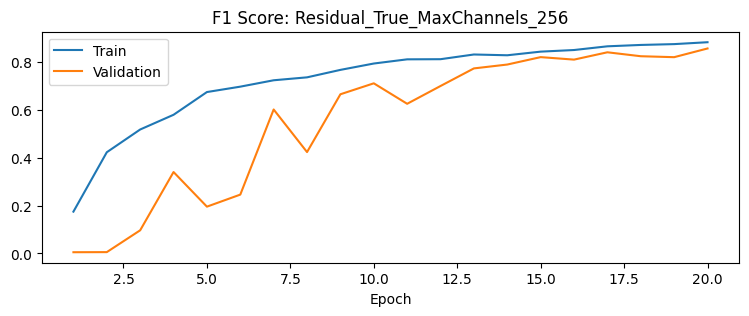

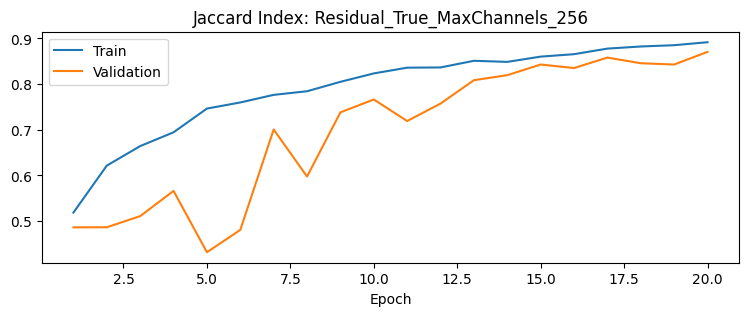

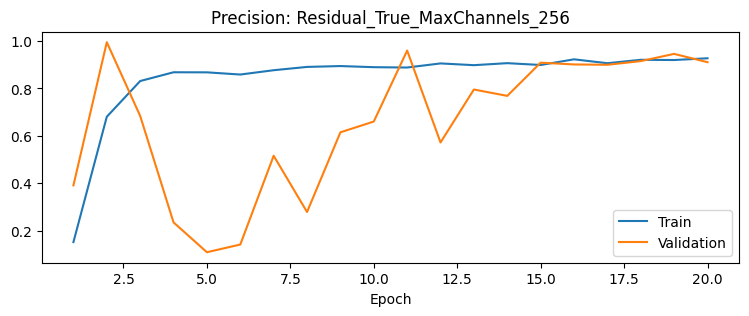

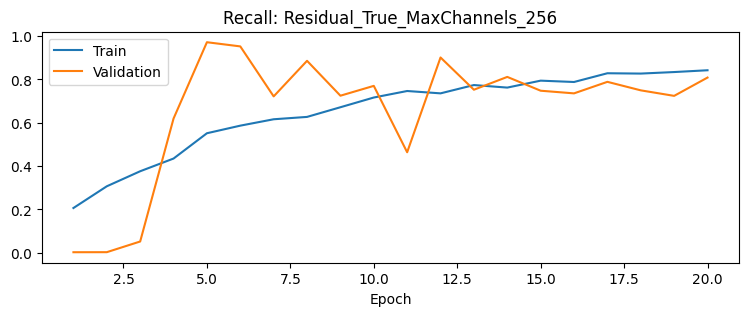

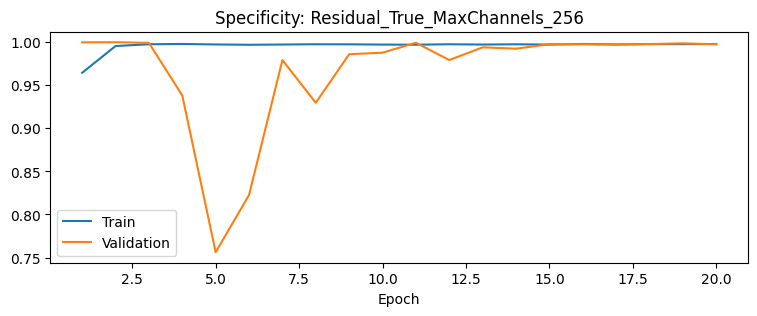

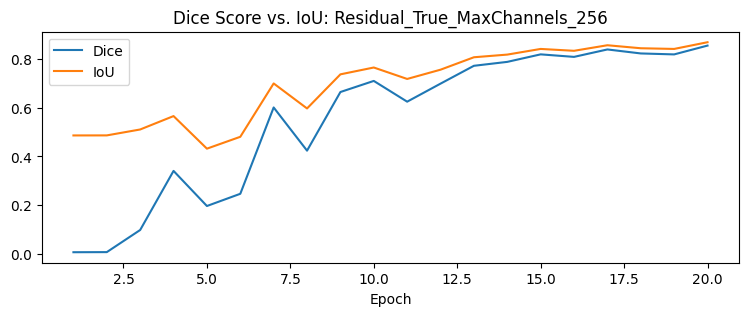

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.8752, Dice=0.0633, IoU=0.4537, Loss=1.5910]


Training   - Accuracy: 0.7617 | Dice: 0.0995 | IoU: 0.4054 | Loss: 1.6806
Validation - Accuracy: 0.8185 | Dice: 0.0877 | IoU: 0.4314 | Loss: 1.6118

Epoch 2/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9774, Dice=0.1133, IoU=0.5187, Loss=1.4888]


Training   - Accuracy: 0.9718 | Dice: 0.4679 | IoU: 0.6384 | Loss: 1.0558
Validation - Accuracy: 0.9661 | Dice: 0.1620 | IoU: 0.5271 | Loss: 1.4618

Epoch 3/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9796, Dice=0.0956, IoU=0.5149, Loss=1.3273]


Training   - Accuracy: 0.9780 | Dice: 0.4920 | IoU: 0.6520 | Loss: 0.7853
Validation - Accuracy: 0.9721 | Dice: 0.1244 | IoU: 0.5192 | Loss: 1.2780

Epoch 4/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.71s/it, Acc=0.9331, Dice=0.2034, IoU=0.5228, Loss=1.2929]


Training   - Accuracy: 0.9808 | Dice: 0.5830 | IoU: 0.6960 | Loss: 0.6193
Validation - Accuracy: 0.9339 | Dice: 0.3355 | IoU: 0.5672 | Loss: 1.2325

Epoch 5/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.8845, Dice=0.2449, IoU=0.5109, Loss=1.3334]


Training   - Accuracy: 0.9835 | Dice: 0.6558 | IoU: 0.7355 | Loss: 0.5051
Validation - Accuracy: 0.8533 | Dice: 0.2731 | IoU: 0.5036 | Loss: 1.3392

Epoch 6/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.64s/it, Acc=0.9818, Dice=0.4465, IoU=0.6345, Loss=0.7063]


Training   - Accuracy: 0.9853 | Dice: 0.7071 | IoU: 0.7659 | Loss: 0.4371
Validation - Accuracy: 0.9800 | Dice: 0.6755 | IoU: 0.7448 | Loss: 0.6449

Epoch 7/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9807, Dice=0.5598, IoU=0.6846, Loss=0.6543]


Training   - Accuracy: 0.9867 | Dice: 0.7447 | IoU: 0.7898 | Loss: 0.3838
Validation - Accuracy: 0.9777 | Dice: 0.6750 | IoU: 0.7433 | Loss: 0.6208

Epoch 8/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9822, Dice=0.3616, IoU=0.6014, Loss=0.5467]


Training   - Accuracy: 0.9872 | Dice: 0.7510 | IoU: 0.7941 | Loss: 0.3544
Validation - Accuracy: 0.9843 | Dice: 0.7319 | IoU: 0.7806 | Loss: 0.4431

Epoch 9/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9830, Dice=0.4083, IoU=0.6197, Loss=0.5007]


Training   - Accuracy: 0.9889 | Dice: 0.7945 | IoU: 0.8238 | Loss: 0.3074
Validation - Accuracy: 0.9859 | Dice: 0.7373 | IoU: 0.7847 | Loss: 0.3929

Epoch 10/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9900, Dice=0.7251, IoU=0.7793, Loss=0.3267]


Training   - Accuracy: 0.9887 | Dice: 0.7850 | IoU: 0.8173 | Loss: 0.2947
Validation - Accuracy: 0.9891 | Dice: 0.8091 | IoU: 0.8341 | Loss: 0.3044

Epoch 11/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it, Acc=0.9865, Dice=0.5594, IoU=0.6874, Loss=0.3535]


Training   - Accuracy: 0.9899 | Dice: 0.8149 | IoU: 0.8387 | Loss: 0.2627
Validation - Accuracy: 0.9891 | Dice: 0.7955 | IoU: 0.8246 | Loss: 0.2893

Epoch 12/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.67s/it, Acc=0.9899, Dice=0.7159, IoU=0.7736, Loss=0.2847]


Training   - Accuracy: 0.9904 | Dice: 0.8259 | IoU: 0.8469 | Loss: 0.2486
Validation - Accuracy: 0.9897 | Dice: 0.8205 | IoU: 0.8425 | Loss: 0.2695

Epoch 13/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9860, Dice=0.5427, IoU=0.6791, Loss=0.3665]


Training   - Accuracy: 0.9908 | Dice: 0.8342 | IoU: 0.8531 | Loss: 0.2341
Validation - Accuracy: 0.9892 | Dice: 0.8035 | IoU: 0.8302 | Loss: 0.2753

Epoch 14/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it, Acc=0.9870, Dice=0.5905, IoU=0.7029, Loss=0.3446]


Training   - Accuracy: 0.9913 | Dice: 0.8427 | IoU: 0.8596 | Loss: 0.2194
Validation - Accuracy: 0.9894 | Dice: 0.8229 | IoU: 0.8441 | Loss: 0.2685

Epoch 15/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it, Acc=0.9921, Dice=0.8106, IoU=0.8367, Loss=0.2461]


Training   - Accuracy: 0.9916 | Dice: 0.8488 | IoU: 0.8643 | Loss: 0.2080
Validation - Accuracy: 0.9904 | Dice: 0.8214 | IoU: 0.8436 | Loss: 0.2320

Epoch 16/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9926, Dice=0.8114, IoU=0.8375, Loss=0.2280]


Training   - Accuracy: 0.9923 | Dice: 0.8651 | IoU: 0.8771 | Loss: 0.1938
Validation - Accuracy: 0.9906 | Dice: 0.8245 | IoU: 0.8459 | Loss: 0.2233

Epoch 17/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9905, Dice=0.7313, IoU=0.7834, Loss=0.2546]


Training   - Accuracy: 0.9924 | Dice: 0.8652 | IoU: 0.8773 | Loss: 0.1845
Validation - Accuracy: 0.9904 | Dice: 0.8193 | IoU: 0.8420 | Loss: 0.2238

Epoch 18/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.71s/it, Acc=0.9888, Dice=0.6589, IoU=0.7400, Loss=0.2736]


Training   - Accuracy: 0.9931 | Dice: 0.8804 | IoU: 0.8896 | Loss: 0.1727
Validation - Accuracy: 0.9907 | Dice: 0.8294 | IoU: 0.8495 | Loss: 0.2152

Epoch 19/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it, Acc=0.9911, Dice=0.7579, IoU=0.8006, Loss=0.2387]


Training   - Accuracy: 0.9933 | Dice: 0.8807 | IoU: 0.8899 | Loss: 0.1625
Validation - Accuracy: 0.9908 | Dice: 0.8492 | IoU: 0.8642 | Loss: 0.2174

Epoch 20/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it, Acc=0.9902, Dice=0.7179, IoU=0.7750, Loss=0.2399]


Training   - Accuracy: 0.9936 | Dice: 0.8884 | IoU: 0.8963 | Loss: 0.1561
Validation - Accuracy: 0.9913 | Dice: 0.8402 | IoU: 0.8578 | Loss: 0.1953



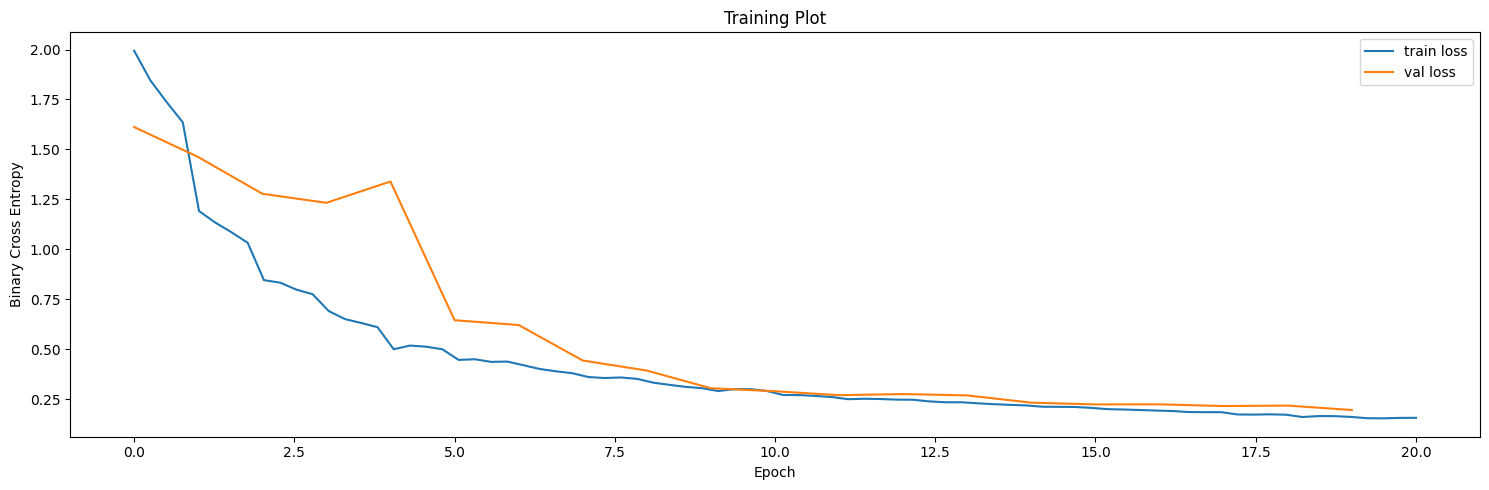

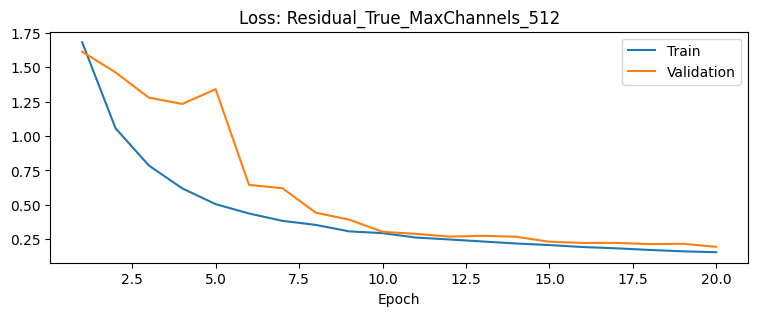

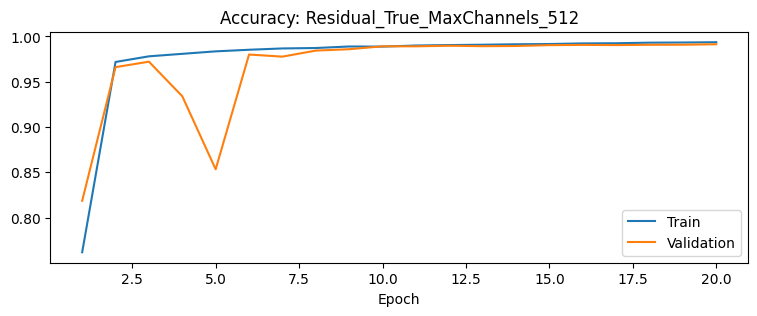

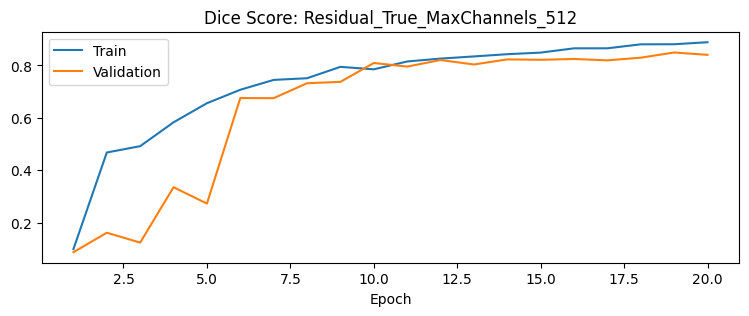

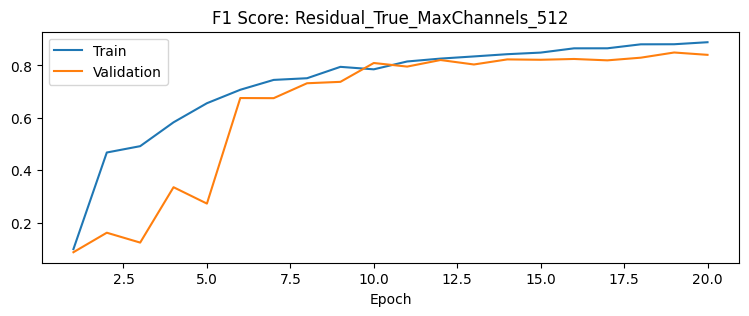

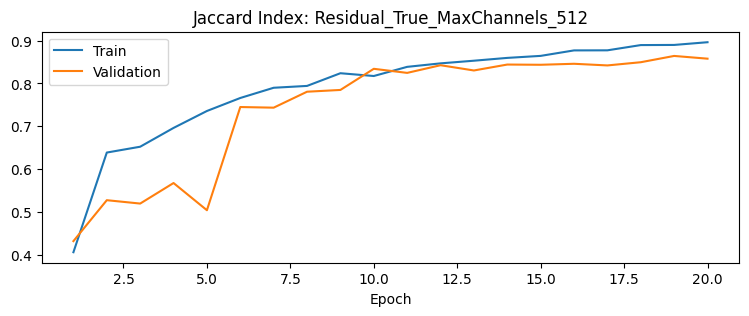

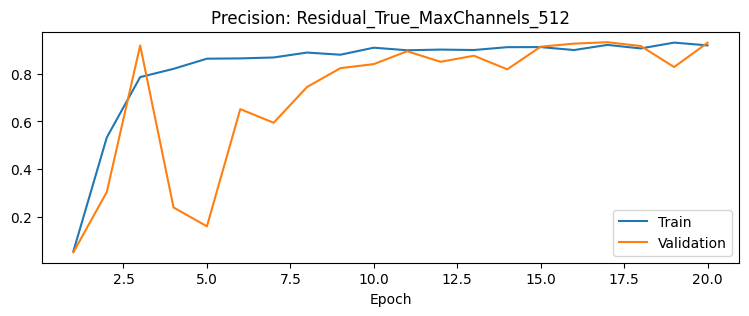

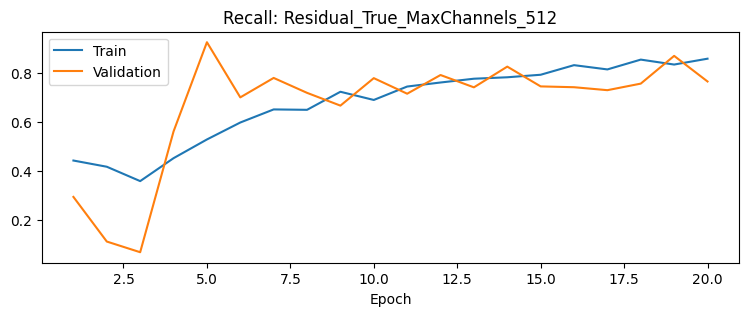

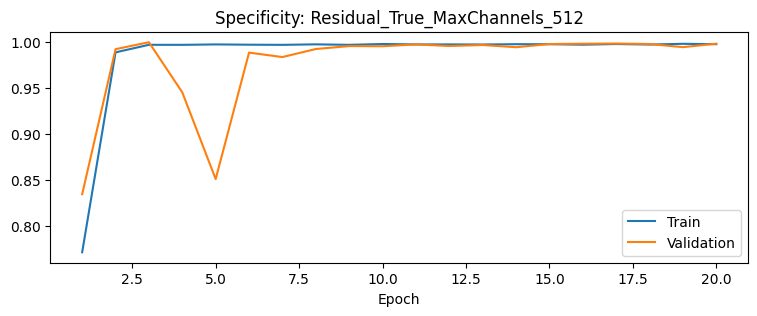

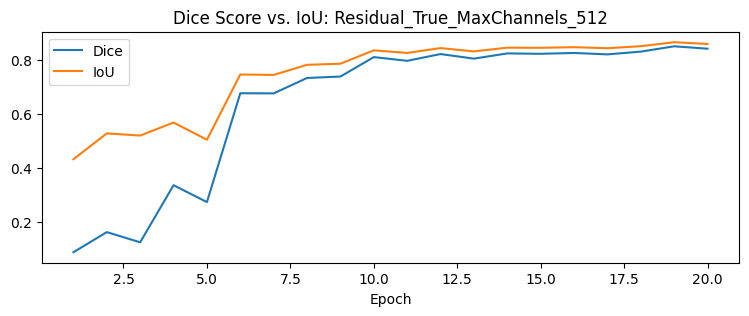

In [4]:
best_model = None
best_dice_score = 0.0
best_train_loss_batch_history = None
best_train_loss_history = None
best_val_loss_history = None
best_train_metrics = None
best_val_metrics = None
best_train_loss = 100
best_val_loss = 100

epochs = 20
channels = (3, 32, 64, 128)
is_residual = True
bias = True
learning_rate = 1e-3
weight_decay = 1e-4
lr_reduce_factor = 0.15
patience = 2
model_name = 'UNet'

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

channels = [[3, 32, 64, 128], [3, 32, 64, 128, 256], [3, 32, 64, 128, 256, 512]]
residuals = [False, True]

for res in residuals:
    for ch in channels:
        model_path = f'res_{res}_ch_{ch[-1]}'
        model = UNet(ch, res, bias).to(device)
        criterion = DiceBCELoss(device).to(device=device)
        optimizer = torch.optim.Adam(model.parameters())
        # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=lr_reduce_factor, patience=patience)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-6)

        solver = Solver(
            model,
            epochs,
            device,
            train_loader,
            val_loader,
            criterion,
            optimizer,
            scheduler,
            model_name,
            model_path
        )

        solver.fit()
        
        best_train_loss_batch_history = solver.train_loss_batch
        best_train_loss_history = solver.train_loss_history
        best_val_loss_history = solver.val_loss_history
        best_train_metrics = solver.train_metrics
        best_val_metrics = solver.val_metrics
        
        plot_losses(best_train_loss_batch_history, best_val_loss_history)
        train_metrics_acc = best_train_metrics.get_metrics()
        val_metrics_acc = best_val_metrics.get_metrics()
        
        title = f'Residual_{res}_MaxChannels_{ch[-1]}'
        plot_generic(f'Loss: {title}', 'Epoch', 'Train', best_train_loss_history, 'Validation', best_val_loss_history)
        plot_generic(f'Accuracy: {title}', 'Epoch', 'Train', train_metrics_acc[ACCURACY], 'Validation', val_metrics_acc[ACCURACY])
        plot_generic(f'Dice Score: {title}', 'Epoch', 'Train', train_metrics_acc[DICE_SCORE], 'Validation', val_metrics_acc[DICE_SCORE])
        plot_generic(f'F1 Score: {title}', 'Epoch', 'Train', train_metrics_acc[F1_SCORE], 'Validation', val_metrics_acc[F1_SCORE])
        plot_generic(f'Jaccard Index: {title}', 'Epoch', 'Train', train_metrics_acc[JACCARD_INDEX], 'Validation', val_metrics_acc[JACCARD_INDEX])
        plot_generic(f'Precision: {title}', 'Epoch', 'Train', train_metrics_acc[PRECISION], 'Validation', val_metrics_acc[PRECISION])
        plot_generic(f'Recall: {title}', 'Epoch', 'Train', train_metrics_acc[RECALL], 'Validation', val_metrics_acc[RECALL])
        plot_generic(f'Specificity: {title}', 'Epoch', 'Train', train_metrics_acc[SPECIFICITY], 'Validation', val_metrics_acc[SPECIFICITY])
        plot_generic(f'Dice Score vs. IoU: {title}', 'Epoch', 'Dice', val_metrics_acc[DICE_SCORE], 'IoU', val_metrics_acc[JACCARD_INDEX])

        #if solver.best_dice_score > best_dice_score:
            #best_model = solver.best_model
            #best_dice_score = solver.best_dice_score
            #best_train_loss_batch_history = solver.train_loss_batch
            #best_train_loss_history = solver.train_loss_history
            #best_val_loss_history = solver.val_loss_history
            #best_train_metrics = solver.train_metrics
            #best_val_metrics = solver.val_metrics
            #best_train_loss = solver.best_train_loss
            #best_val_loss = solver.best_val_loss
            #torch.save(best_model, f'saved_models/{model_name}/Dice_{best_dice_score:.4f}_lr_{learning_rate}_reg_{weight_decay}_train_loss_{best_train_loss:.4f}_val_loss_{best_val_loss:.4f}_ch_{channels[-1]}.pt')


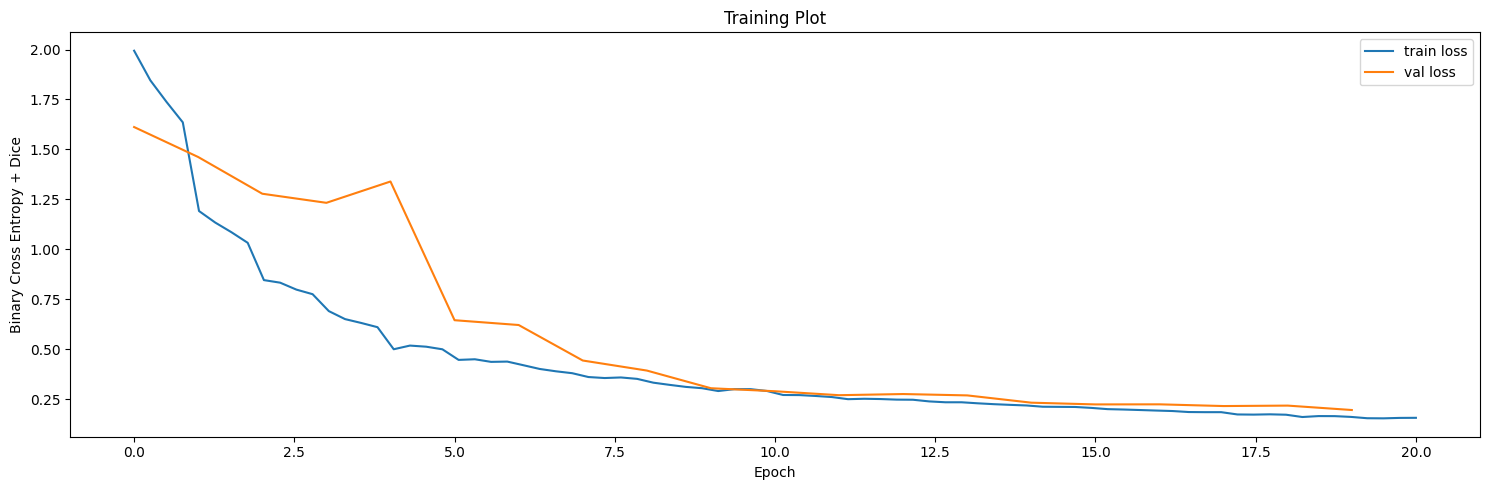

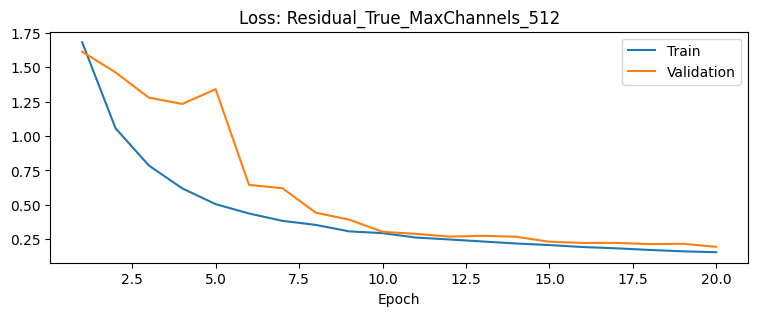

In [16]:
plot_path = f'saved_plots/TransformerUNet/{model_path}.png'
plot_losses(best_train_loss_batch_history, best_val_loss_history, plot_path)
plot_generic(f'Loss: {title}', 'Epoch', 'Train', best_train_loss_history, 'Validation', best_val_loss_history, 'saved_plots/TransformerUNet/b.png')

In [6]:
#train_metrics_acc = best_train_metrics.get_metrics()
#val_metrics_acc = best_val_metrics.get_metrics()
#plot_generic('Loss', 'Epoch', 'Train', best_train_loss_history, 'Validation', best_val_loss_history)
#plot_generic('Accuracy', 'Epoch', 'Train', train_metrics_acc[ACCURACY], 'Validation', val_metrics_acc[ACCURACY])
#plot_generic('Dice Score', 'Epoch', 'Train', train_metrics_acc[DICE_SCORE], 'Validation', val_metrics_acc[DICE_SCORE])
#plot_generic('Jaccard Index', 'Epoch', 'Train', train_metrics_acc[JACCARD_INDEX], 'Validation', val_metrics_acc[JACCARD_INDEX])
#plot_generic('Dice Score vs. Jaccard Index', 'Epoch', 'Dice', val_metrics_acc[DICE_SCORE], 'IoU', val_metrics_acc[JACCARD_INDEX])

In [24]:
test_metrics_acc = Metrics(device, 2)
criterion = DiceBCELoss(device).to(device=device)
model_test = '20_TDice_0.8828_VDice_0.8567_TLoss_0.1300_VLoss_0.1592.pt'
test_loss = solver.evaluate(torch.load(f'../saved_models/UNet/res_True_ch_256/{model_test}'), criterion, device, val_loader, test_metrics_acc)
test_metrics_acc.compute()
test_metrics_acc = test_metrics_acc.get_metrics()
print(f'Acc: {test_metrics_acc[ACCURACY][0].item():.4f}')
print(f'Dice: {test_metrics_acc[DICE_SCORE][0].item():.4f}')
print(f'F1: {test_metrics_acc[F1_SCORE][0].item():.4f}')
print(f'IoU: {test_metrics_acc[JACCARD_INDEX][0].item():.4f}')
print(f'Prec: {test_metrics_acc[PRECISION][0].item():.4f}')
print(f'RECALL: {test_metrics_acc[RECALL][0].item():.4f}')
print(f'SPECIFICITY: {test_metrics_acc[SPECIFICITY][0].item():.4f}')

Validation: 100%|██████████| 2/2 [00:04<00:00,  2.01s/it, Acc=0.9926, Dice=0.8038, IoU=0.8322, Loss=0.1710]

Acc: 0.9920
Dice: 0.8567
F1: 0.8567
IoU: 0.8705
Prec: 0.9106
RECALL: 0.8087
SPECIFICITY: 0.9976


In [26]:
from torchsummary import summary
test = UNet([3, 32, 64, 128, 256], True, True).to(device)
summary(test, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 32, 128, 128]           9,248
       BatchNorm2d-5         [-1, 32, 128, 128]              64
            Conv2d-6         [-1, 32, 128, 128]             128
       BatchNorm2d-7         [-1, 32, 128, 128]              64
         ConvBlock-8         [-1, 32, 128, 128]               0
         MaxPool2d-9           [-1, 32, 64, 64]               0
     EncoderLayer-10  [[-1, 32, 128, 128], [-1, 32, 64, 64]]               0
           Conv2d-11           [-1, 64, 64, 64]          18,496
      BatchNorm2d-12           [-1, 64, 64, 64]             128
             ReLU-13           [-1, 64, 64, 64]               0
           Conv2d-14      